<img src="https://github.com/PKhosravi-CityTech/LightCnnRad/raw/main/Images/BioMindLogo.png" alt="BioMind AI Lab Logo" width="150" height="150" align="left" style="margin-bottom: 40px;"> **Repository Developed by Pegah Khosravi, Principal Investigator of the BioMind AI Lab**

Welcome to this repository! This notebook is designed to provide hands-on experience and foundational knowledge in machine learning. It is part of our journey to explore key ML concepts, algorithms, and applications. Whether you're a PhD student, or a master's student, this repository aims to support your learning goals and encourage critical thinking about machine learning systems.


# **Week 9: Convolutional Neural Networks (CNNs)**

In this session, we will cover:
1. Understand how CNNs process visual data
2. Build and train basic CNNs in PyTorch
3. Interpret convolutional and pooling layers
4. Explore key CNN architectures (LeNet, ResNet, UNet)
5. Apply transfer learning using pre-trained models
6. Evaluate model performance on vision datasets

# Introduction to Convolutional Neural Networks (CNNs)

A Convolutional Neural Network (CNN) is a type of neural network designed to work with visual data, like images.

### Why Dense (Fully Connected) Networks Don’t Scale Well to Images

Traditional neural networks like MLPs (or FFNNs) treat input data as flat vectors, ignoring the spatial structure of images.

For example:
- A **28×28 grayscale** image becomes a **784-dimensional vector**
- A **224×224 RGB** image becomes a **150,528-dimensional vector** (224×224×3)

This leads to a huge number of parameters when using fully connected layers.

⚠️ **Problems with Fully Connected Layers for Images:**

- High memory and compute cost
  - A 224×224×3 image = 150,528 inputs. Connecting to just 1000 neurons = 150M parameters!

- Doesn’t leverage spatial structure
 - Nearby pixels in images are related (e.g., edges, shapes), but dense layers treat all pixels as independent.

- Easily overfits, especially with small datasets
 - Too many parameters = model can memorize data instead of learning general patterns.

### 🛡️ CNNs to the Rescue!

**Convolutional Neural Networks (CNNs)** are designed to work with grid-like data — such as images, where pixels are arranged in a 2D grid. Each pixel is not isolated, but part of a local neighborhood (e.g., 3×3 or 5×5 regions), and CNNs take advantage of this structure to capture spatial hierarchies.

Instead of connecting every pixel to every neuron, CNNs use **small filters (kernels)** that slide over the image, detecting useful patterns such as Edges, Corners, Textures, and Objects. Think of CNNs as **pattern detectors** that scan for visual features.

CNNs were first proposed by Yann LeCun in the late 1980s at AT&T Bell Labs in Murray Hill, NJ, with early versions like LeNet-1 and LeNet-4. The most well-known version, LeNet-5, was introduced in 1998 and became a foundational architecture for tasks like handwritten digit recognition.






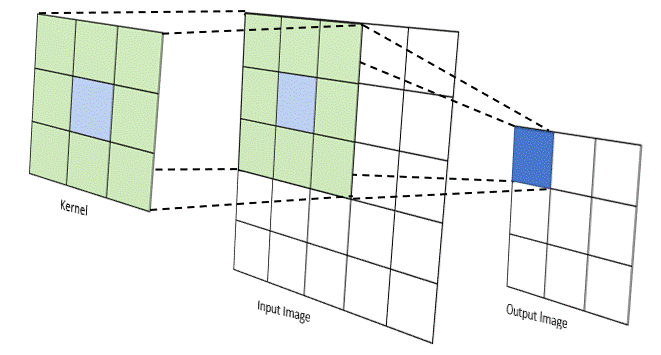

Ref: https://medium.com/@timothy_terati/image-convolution-filtering-a54dce7c786b

### Spatial Hierarchy & Local Receptive Fields

CNNs learn **hierarchical features** layer by layer:

| Layer Type      | Learns             |
|------------------|---------------------|
| Early layers     | Edges, corners      |
| Middle layers    | Shapes, textures    |
| Deeper layers    | Objects, categories |

🔹 **Local Receptive Field**
- Each neuron in a conv layer connects to only a small patch of the input (e.g., 3×3 pixels), not the whole image.
- This patch is called the receptive field.

🔹 **Why it's useful**
- Keeps the spatial layout of the image (neighboring pixels stay together)
- Requires far fewer parameters than fully connected layers


### Convolution Equation in CNNs

Given an input matrix $I$ and a kernel $K$, the convolution output $O$ at position $(i, j)$ is:

$$ O(i, j) = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} I(i+m, j+n) \cdot K(m, n) $$

Here, $k$ is the kernel size (e.g., 3 for a 3x3 kernel). $m$ is the vertical index (row) in the kernel and $n$ is the horizontal index (column) in the kernel.

#### Matrix Orientation Clarification

- $i$ and $j$:

 - $i$ is the row index (vertical position).
 - $j$ is the column index (horizontal position).

 So $O(i, j)$ refers to the pixel (or value) at row $i$, column $j$ in the output.

- $m$ and $n$: These are the indices over the kernel (filter).
 - $m$ is the row index within the kernel.
 - $n$ is the column index within the kernel.

 So $K(m, n)$ is the kernel weight at row $m$, column $n$.




### What This Equation Does
This equation computes the **output value** at position $(i, j)$ in the feature map by:
- Aligning the kernel at position $(i, j)$ on the input,
- Multiplying overlapping elements between the input and kernel,
- Summing them into a single number.


### 📄 Variable Breakdown

| Symbol         | Meaning |
|----------------|---------|
| $$O(i, j)$$      | Output value at position $(i, j)$ in the feature map (the result after applying the kernel). |
| $$I(i+m, j+n)$$  | Value from the input image or feature map, from the patch under the kernel. |
| $$K(m, n)$$      | Kernel (filter) value at position $(m, n)$. These are learnable weights. |
| $$m, n$$         | Indices used to loop over the kernel's height and width. (e.g., 0 to 2 for a 3x3 kernel). |
| $$i, j$$         | Current position on the output feature map (shifts as the kernel moves). |



### Example with 3x3 Kernel
If your input is 5x5 and your kernel is 3x3 with stride 1:

To compute the top-left output value:

$$O(0, 0) = \sum_{m=0}^2 \sum_{n=0}^2 I(0+m, 0+n) \cdot K(m, n)$$

This means:
- Take a 3x3 patch starting at top-left of the input
- Multiply it element-wise with the 3x3 kernel
- Sum all the results into one number → that becomes $O(0, 0)$

Then move the kernel one step right for $O(0, 1)$, and so on.


### Intuition
- You're sliding a pattern (kernel) over the image.
- At each spot, you measure **how well the pattern matches** that patch.
- The more it matches, the higher the output value.


This is the core operation that lets CNNs detect patterns like edges, textures, or shapes! This operation extracts **localized features** while reusing weights (kernel values), making training more efficient.

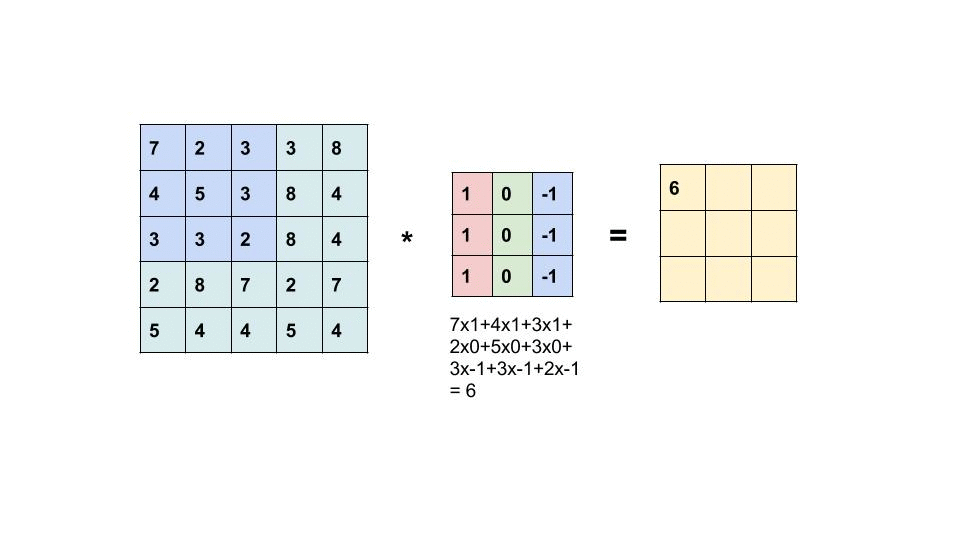

Simple Convolution of a (5x5) matrix with a (3x3) kernel

Ref: https://medium.datadriveninvestor.com/convolutional-neural-networks-3b241a5da51e

### What Is a Filter (Kernel)?

A filter (also called a kernel) is a small matrix used in image processing to detect patterns like edges, textures, or shapes by scanning across the image using a mathematical operation called convolution.


Just like CNNs use filters to detect patterns, traditional image processing also uses hand-crafted filters — predefined kernels designed by humans for specific tasks like edge detection or smoothing.

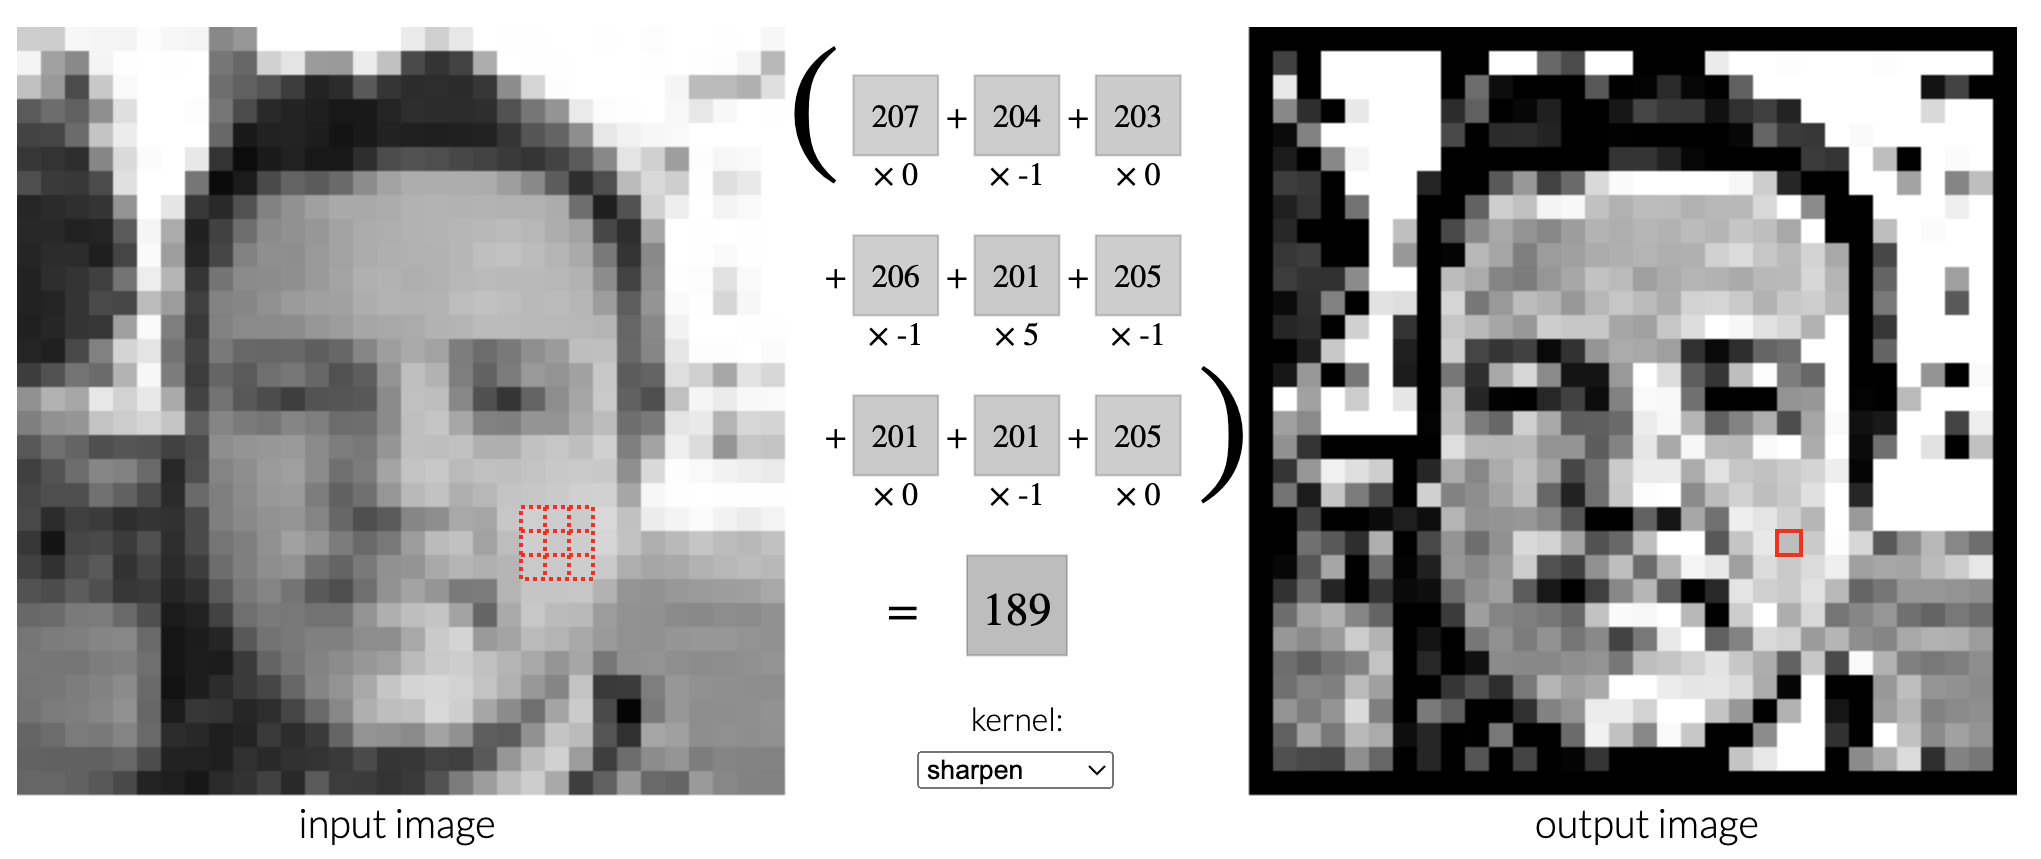

https://setosa.io/ev/image-kernels/

### ❓ What Are the Numbers the Convolutional Kernel Slides Over?

In CNNs, the kernel (also called a filter) slides over a feature map (usually an image or activation map), and performs an element-wise multiplication followed by summation.

The numbers that the kernel slides over are the pixel values (if it’s an image) or activation values (if it’s a deeper layer). These numbers can vary depending on where in the network you're applying convolution.



### 📊 Typical Ranges

| Layer                | Data Type             | Typical Range   | Explanation                                      |
|----------------------|------------------------|------------------|--------------------------------------------------|
| Input Image (RGB)    | Raw pixel values       | 0–255 (integers) | Standard 8-bit images.                           |
| Normalized Input     | After preprocessing    | 0–1 or -1–1     | Common normalization step before feeding into CNN. |
| After Convolution    | Activation values      | Varies widely    | Depends on weights, biases, and activation functions. |
| After ReLU           | Post-activation        | 0–∞            | ReLU sets all negative values to 0.              |
| After BatchNorm      | Normalized activations | Often ~ -1 to 1  | BatchNorm rescales and recenters the data.       |



#### Common Hand-Crafted Image Filters (Kernels)


| Filter         | Main Use             | Detects / Enhances         |
|----------------|----------------------|-----------------------------|
| Sobel          | Edge detection       | Horizontal or vertical edges |
| Prewitt        | Edge detection       | Same as Sobel, less smooth |
| Laplacian      | Edge detection       | All directions              |
| Gaussian       | Smoothing            | Blurs, removes noise        |
| Box / Mean     | Smoothing            | Simple blur                 |
| Sharpening     | Detail enhancement   | Edges, fine details         |
| Identity       | No effect            | None (used for testing)     |



Filters like Sobel, Prewitt, and Gaussian are manually designed by humans based on rules or mathematical intuition. These filters are fixed and always used the same way — a common approach in traditional image processing.

In contrast, CNNs automatically learn filters by optimizing them during training using gradient descent. They start with random filter weights and adjust them based on the task (e.g., classifying cats vs. dogs).

CNN filters don’t come with names, and they’re not guaranteed to match traditional filters — but in early layers, they often resemble edge detectors or texture filters. Most importantly, CNNs learn whatever patterns are most useful for the specific task at hand.


#### Visual Intuition: Edge Detection Example

Now, let’s apply a **Sobel filter** in PyTorch to see how a basic convolution works in action. We'll use it to detect vertical edges in a grayscale image.



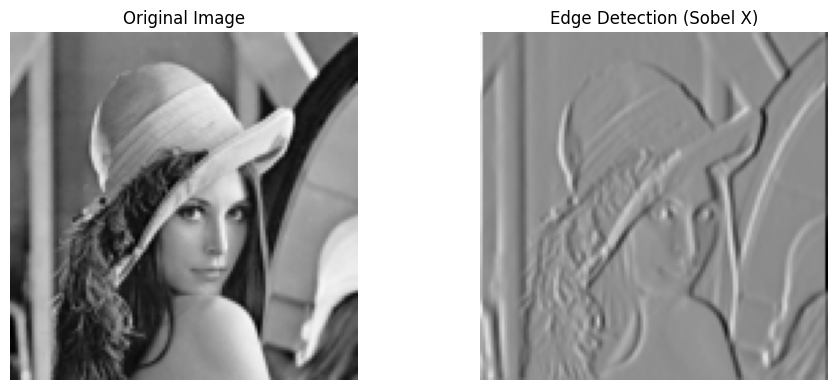

In [ ]:
# 🧪 Applying a Hand-Crafted Filter (Sobel) with PyTorch

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import urllib.request
import io

# -----------------------------
# 1. Load a grayscale image
# -----------------------------
# We use the classic 'Lenna' test image from the web
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
response = urllib.request.urlopen(url)
img = Image.open(io.BytesIO(response.read())).convert("L")  # "L" = convert to grayscale

# -----------------------------
# 2. Preprocess the image
# -----------------------------
# - Resize to 128x128 pixels
# - Convert to PyTorch tensor
# - Add batch dimension: [1, 1, H, W]
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()  # Output shape: [C, H, W] where C=1 for grayscale. C = Channels (e.g., 1 for grayscale, 3 for RGB), H = Height of the image (number of rows), W = Width of the image (number of columns)
])
input_img = transform(img).unsqueeze(0)  # Add batch dimension -> shape becomes [1, 1, 128, 128]

# Ensure the tensor is float32 and on CPU
input_img = input_img.to(dtype=torch.float32, device='cpu')

# -----------------------------
# 3. Define a manual Sobel X filter
# -----------------------------
# This filter detects vertical edges by computing horizontal gradients
sobel_x = torch.tensor([
    [-1., 0., 1.],
    [-2., 0., 2.],
    [-1., 0., 1.]
], dtype=torch.float32)

# Reshape the filter to match the shape expected by conv2d: [out_channels, in_channels, kernel_height, kernel_width]
sobel_filter = sobel_x.unsqueeze(0).unsqueeze(0)  # Shape: [1, 1, 3, 3]

# -----------------------------
# 4. Apply the convolution
# -----------------------------
# Use padding=1 to keep output size same as input
# Output shape: [1, 1, 128, 128]
edge_img = F.conv2d(input_img, sobel_filter, padding=1)

# -----------------------------
# 5. Visualize the results
# -----------------------------
plt.figure(figsize=(10, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(input_img.squeeze().numpy(), cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Edge-detected image using Sobel X
plt.subplot(1, 2, 2)
plt.imshow(edge_img.squeeze().detach().numpy(), cmap='gray')
plt.title("Edge Detection (Sobel X)")
plt.axis("off")

plt.tight_layout()
plt.show()


## 👩‍💻 Who Was Lenna?

Lenna (or Lena) is the name of a cropped image of a Swedish model, Lena Söderberg, that became one of the most widely used test images in the history of computer vision and image processing.

The image was taken from a 1972 Playboy magazine centerfold.

Researchers at the University of Southern California's Signal and Image Processing Institute scanned the image in 1973.

The cropped version — just showing her head and shoulders — became a de facto standard test image for experiments in compression, enhancement, and reconstruction.

## 📸 Why Did It Become So Popular?
The photo had natural textures (skin, hair, feathered hat), varied detail, and was well-composed — ideal for testing algorithms.

It was available in digital form early on, which made it easy to share and reproduce.

It became an unofficial benchmark image in the field.

## 🤔 Controversy and Ethics
Over time, the use of the image has become controversial due to its origin in adult content. Many in the field have moved away from using it, especially in educational and inclusive environments (yes, the very one we just used above — oops! 😅).

Some conferences and institutions have formally stopped using the image.

Alternative standard images (like “peppers,” “baboon,” “cameraman,” and modern datasets like ImageNet, CIFAR, or Fashion MNIST) are now preferred.

So while Lenna has a huge legacy in computer vision history, today, the community is more conscious about choosing test images that are ethically appropriate and inclusive.

# Convolutional Layer Mechanics

Convolutional Neural Networks (CNNs) are composed of several key layers that extract spatial hierarchies in image data. In this section, we will explore the mechanics of the convolutional layer, activation functions, pooling layers, and the transition to fully connected layers.


### **1. Convolution Operation**

The convolution operation is the core of CNNs. It involves a small matrix of weights, called a **kernel** or **filter**, sliding across the input image to compute dot products.

#### **Mathematical Definition**

Given an input matrix $I$ and a kernel $K$, the convolution output $O$ at position $(i, j)$ is:

$$ O(i, j) = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} I(i+m, j+n) \cdot K(m, n) $$

Here, $k$ is the kernel size (e.g., 3 for a 3x3 kernel). $m$ is the vertical index (row) in the kernel and $n$ is the horizontal index (column) in the kernel.

#### **Stride and Padding**

- **Stride (S)**: Determines how much the filter moves at each step.
- **Padding (P)**: Adds borders to the input to control spatial dimensions.

The output dimension $O$ for an input of size $W \times H$ with a filter of size $F$, stride $S$, and padding $P$ is:

$$ O_W = \left\lfloor \frac{W - F + 2P}{S} \right\rfloor + 1 $$
$$ O_H = \left\lfloor \frac{H - F + 2P}{S} \right\rfloor + 1 $$

#### **Example in Python (Using PyTorch)**
```python
import torch
import torch.nn as nn

conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1)
input_tensor = torch.randn(1, 1, 5, 5)  # Batch x Channels x Height x Width
output = conv_layer(input_tensor)
print(output.shape)
```






### Understanding Stride and Padding

When performing a convolution operation, the stride controls how much the filter moves across the input image.

- Stride = 1 means the filter slides one pixel at a time.

- Stride = 2 means the filter skips one pixel in between — so it covers fewer positions and leads to a smaller output.

> ✅ A larger stride results in downsampling (a smaller output).

> ❗ But it also means some parts of the input are ignored — we might miss important details.

That’s where padding comes in!



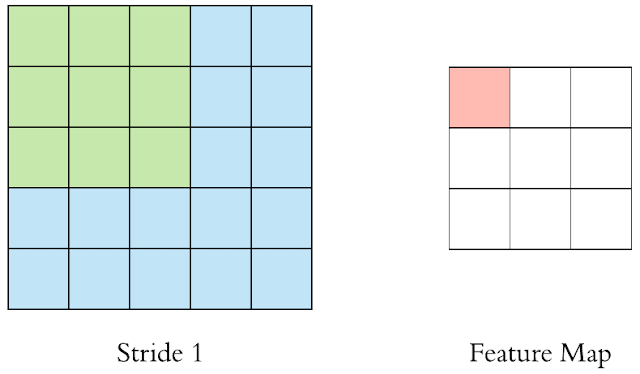

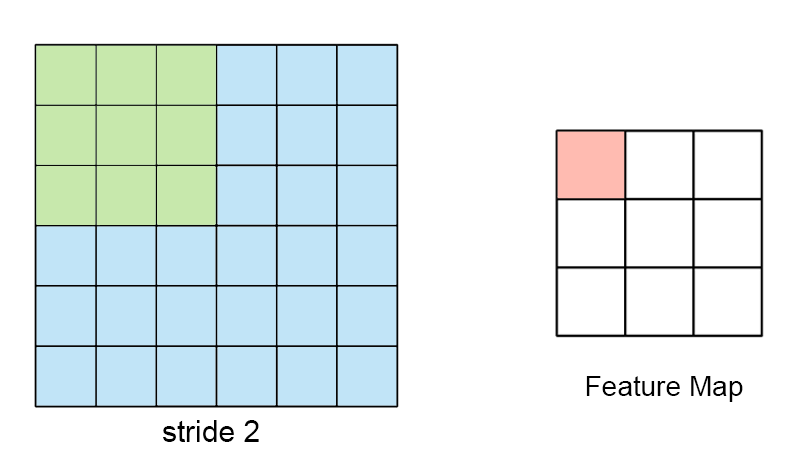

Ref: https://shubhamchauhan125.medium.com/a-simple-explanation-to-filters-stride-and-padding-in-cnn-d0236d4a57ef

### Why Padding?

Without padding, filters can’t fully scan the border pixels.

With padding, we add extra pixels (usually zeros) around the input so that the filter can still touch the edges — helping preserve spatial dimensions and not miss crucial border information.

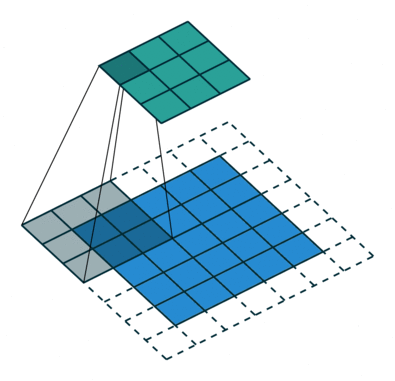

In [ ]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/0/04/Convolution_arithmetic_-_Padding_strides.gif")


### **2. Activation Function (ReLU)**

After convolution, an activation function is applied to introduce non-linearity.

#### **ReLU (Rectified Linear Unit)**

$$ f(x) = \max(0, x) $$

ReLU activates only the positive values, helping the network learn complex patterns efficiently.

#### **Example in Python**
```python
relu = nn.ReLU()
activated_output = relu(output)
```


### **3. Pooling Layer**

Pooling layers are used to reduce the spatial dimensions (height and width) of the feature maps while preserving the most important information. This helps to:

- Decrease the number of parameters, reducing the risk of overfitting

- Lower computational cost, making training more efficient

- Introduce translation invariance, meaning the model becomes less sensitive to small shifts or distortions in the input

By reducing resolution, pooling forces the network to focus on higher-level patterns instead of memorizing exact locations.

#### **Max Pooling**
Selects the maximum value from the patch.

#### **Average Pooling**
Computes the average value from the patch.

#### **Example in Python**
```python
max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
avg_pool = nn.AvgPool2d(kernel_size=2, stride=2)

max_pooled = max_pool(activated_output)
avg_pooled = avg_pool(activated_output)
```




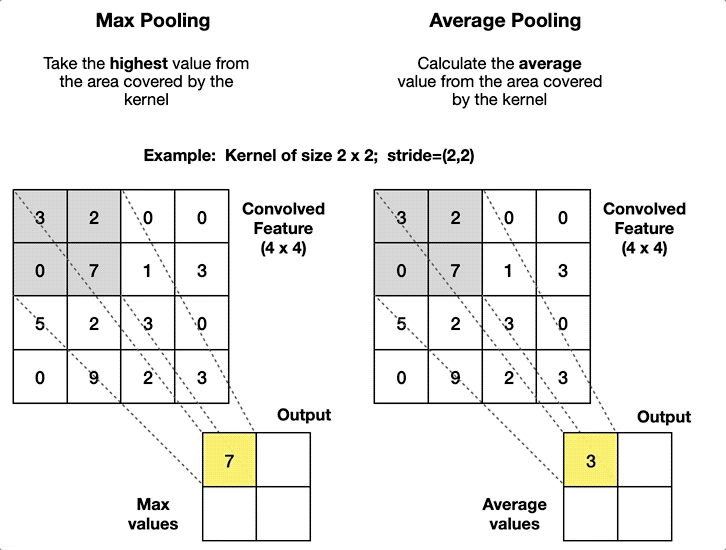

Ref: https://pub.towardsai.net/introduction-to-pooling-layers-in-cnn-dafe61eabe34

### **4. Flattening and Fully Connected Layers**

After convolution and pooling, the feature maps are flattened into a 1D vector and passed into fully connected layers for classification.

Flattening is the bridge between the convolutional part (which learns spatial features) and the fully connected part (which does the final decision-making, like in FFNNs).

#### **Flattening**
```python
flattened = torch.flatten(max_pooled, start_dim=1)  # Ignore batch dimension
```

#### **Fully Connected Layer**
```python
fc = nn.Linear(flattened.shape[1], 10)  # Example: 10 output classes
output = fc(flattened)
```

These components form the backbone of CNN architectures and enable them to efficiently extract and learn from hierarchical patterns in image data.

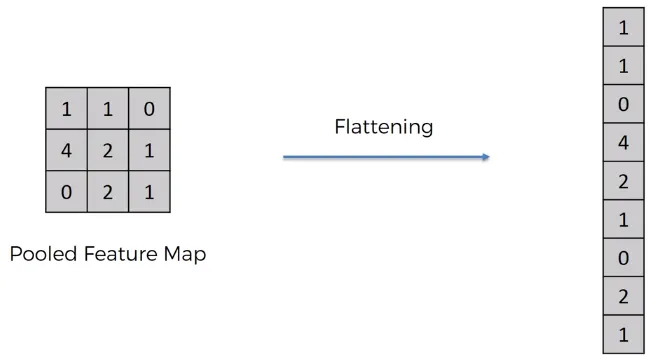

Ref: https://medium.com/@PK_KwanG/cnn-step-2-flattening-50ee0af42e3e

# Basic Structure of Most CNNs:

What you see in that diagram is the fundamental blueprint of almost every CNN:

- **Input Layer**
- **[Conv → Activation → Pooling]** (repeated multiple times)
- **Flatten**
- **Fully Connected (Dense) Layer(s)**
- **Output Layer**

But here’s the nuance:


## Variations in Real CNN Architectures

Modern CNNs build on this basic idea but get more complex and optimized:

### Stacking Layers
- Instead of just one conv + pool, models use many stacked blocks.
- **Example**: VGG16 has 13 convolutional layers and 3 fully connected layers.

### Activation Functions
- Mostly ReLU, but some use **LeakyReLU**, **ELU**, or even **Swish**.

### No Pooling?
- Some CNNs skip pooling entirely and use **strided convolutions** to reduce size. Strided convolution is a type of convolution where the kernel moves more than one pixel at a time across the input. Normally, in a standard convolution, the kernel slides one step at a time (i.e., stride = 1). But with strided convolution, you increase the stride (e.g., stride = 2) so that the kernel skips over some positions.
- Pooling can also be replaced by **global average pooling (GAP)** at the end. Global Average Pooling is a type of pooling layer used in CNNs that reduces each feature map to a single number by taking the average of all its values. Instead of sliding a small window like in max pooling or average pooling, GAP just averages the entire feature map.

### Residual Connections
- Architectures like **ResNet** add **shortcut paths** to let gradients flow better and prevent vanishing gradients.

### Batch Normalization
- Often added after convolutions to stabilize and accelerate training.


🧠 **Think of CNNs Like LEGO:**
All CNNs use the same types of bricks (**Conv**, **Pool**, **ReLU**, **FC**), but you can **stack them**, **reshape them**, or **connect them in creative ways** depending on the problem.

### 🔹 1. ANN / FFNN (Fully Connected Network)

```
Input → Dense → Dense → Dense → Output
```

- Every neuron in one layer is connected to **every neuron** in the next.
- Used for tabular data, simple classification/regression tasks.
- No spatial or positional information is preserved.

### 🔹 2. CNN (Convolutional Neural Network)

```
Input → [Conv → ReLU → Pool] → [Conv → ReLU → Pool] → Flatten → Dense → Output
```

- Early layers learn **spatial features** (edges, textures, shapes).
- Pooling reduces dimensionality and computation.
- **Flatten** converts 2D feature maps to 1D vector.
- Fully connected layers at the end make the final prediction.


### Tip:

> "In an ANN, all the layers are fully connected. In a CNN, the early layers extract spatial patterns using convolution and pooling. Only at the end do we use fully connected layers — similar to an ANN — for classification."

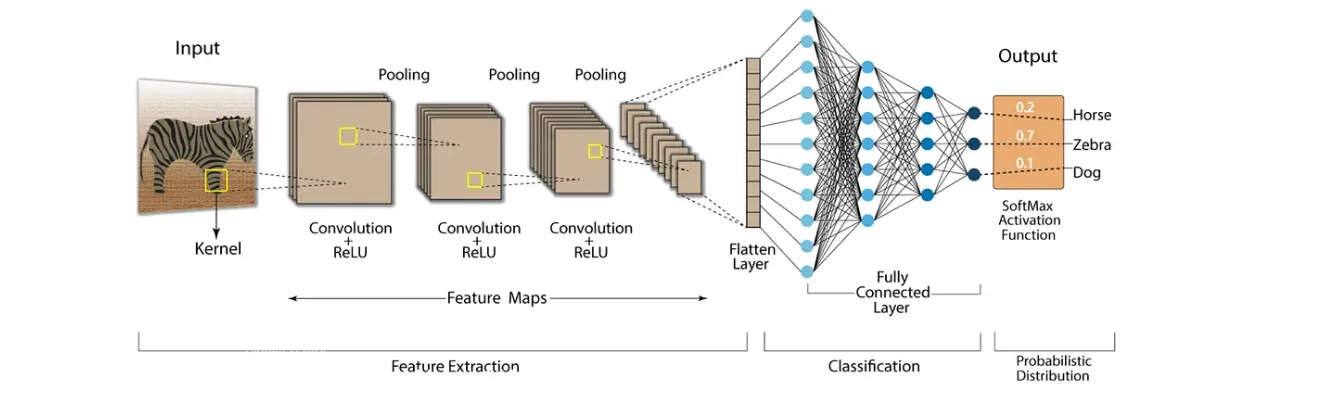

Ref: https://medium.com/@sumbatilinda/deep-learning-part-3-convolution-neural-networks-cnns-acd07bfeb6a1

# Real World Example Using Fashion MNIST

> "Imagine building a system that can automatically recognize types of clothing — T-shirts, sneakers, bags — from pictures. That’s exactly the kind of problem Fashion MNIST simulates."

Fashion MNIST is a curated dataset by **Zalando**, a European e-commerce company, designed to serve as a modern alternative to the original MNIST digit dataset. It contains simple grayscale images of fashion items, which simulate a realistic image classification task without being too complex for beginners.

- **Creator:** Zalando Research  
- **Motivation:** Provide a challenging but accessible dataset for testing machine learning models  
- **Replaces:** The classic handwritten digits MNIST dataset  



### What Are You Learning by Running the Below Code?

By working through this CNN example, you are:

- Seeing how **machine learning applies to computer vision**
- Understanding **how convolutional layers extract patterns** from images
- Learning to **bridge theory and code** using a real dataset
- Practicing with a dataset that balances simplicity and real-world relevance

### CNN Architecture & Dataset Explanation (Fashion MNIST Example)

### 📊 Dataset: Fashion MNIST

**Fashion MNIST** is a dataset of grayscale 28x28 pixel images of clothing items. It is often used as a drop-in replacement for the original MNIST (digits) to benchmark models on a more complex visual task.

- **Classes (10 total):**
  1. T-shirt/top
  2. Trouser
  3. Pullover
  4. Dress
  5. Coat
  6. Sandal
  7. Shirt
  8. Sneaker
  9. Bag
  10. Ankle boot

- **Training samples:** 60,000  
- **Test samples:** 10,000  
- **Each image:** 1 channel (grayscale), 28x28 pixels



### CNN Architecture (LeNet-style Model)

This CNN is inspired by LeNet-5, one of the earliest successful convolutional neural networks, adapted here for Fashion MNIST:

####  Layer-by-Layer Architecture:

1. **Input:** 28x28 grayscale image (1 channel)
2. **Conv1:** `nn.Conv2d(1, 6, 5)` → 6 filters of size 5x5 → Output: 24x24x6
3. **ReLU:** Activation introduces non-linearity
4. **MaxPool1:** `nn.MaxPool2d(2, 2)` → 2x2 pooling → Output: 12x12x6
5. **Conv2:** `nn.Conv2d(6, 16, 5)` → 16 filters of size 5x5 → Output: 8x8x16
6. **ReLU + MaxPool2:** Pool again → Output: 4x4x16
7. **Flatten:** Reshape to 1D vector: 16 * 4 * 4 = 256 features
8. **Fully Connected Layers:**
   - `Linear(256 → 120)` → ReLU
   - `Linear(120 → 84)` → ReLU
   - `Linear(84 → 10)` → Final output logits for 10 classes

### Key Concepts Reinforced
- **Local receptive fields:** via small 5x5 kernels
- **Downsampling:** with max pooling to reduce feature map sizes
- **Non-linearity:** introduced through ReLU
- **Flattening:** bridges the convolutional layers to dense layers
- **Softmax-ready output:** final layer gives class scores (logits)


100%|██████████| 26.4M/26.4M [00:02<00:00, 10.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 170kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.21MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 19.0MB/s]


Epoch 1: Loss=0.6509, Accuracy=75.49%
Epoch 2: Loss=0.4173, Accuracy=84.65%
Epoch 3: Loss=0.3508, Accuracy=87.08%
Epoch 4: Loss=0.3185, Accuracy=88.32%
Epoch 5: Loss=0.2948, Accuracy=89.20%


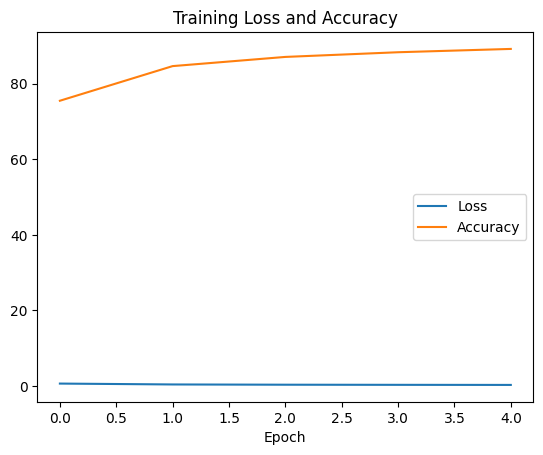

<Figure size 1000x800 with 0 Axes>

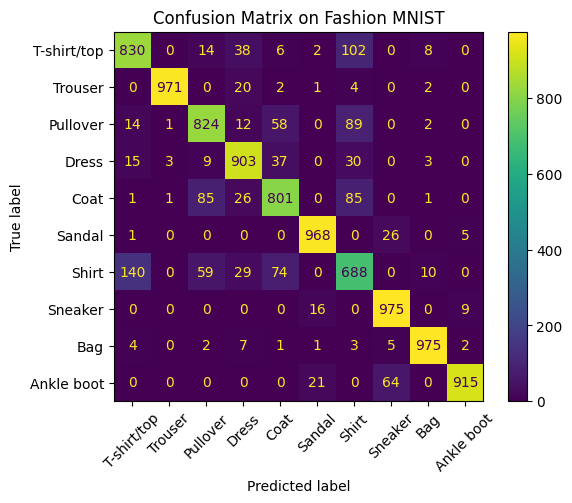

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Define image transformation: convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),                # Convert PIL image to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to [-1, 1]
])

# Load training and test datasets
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders for batching
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Get the class labels
classes = trainset.classes

# Define a basic CNN model (LeNet-style)
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # First convolution layer: 1 input channel, 6 output channels, 5x5 kernel
        self.pool = nn.MaxPool2d(2, 2)   # Max pooling: 2x2 window, stride 2
        self.conv2 = nn.Conv2d(6, 16, 5) # Second convolution layer: 6 input channels, 16 output, 5x5 kernel
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # First fully connected layer
        self.fc2 = nn.Linear(120, 84)         # Second fully connected layer
        self.fc3 = nn.Linear(84, 10)          # Output layer (10 classes)
        self.relu = nn.ReLU()                 # ReLU activation

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))   # Apply conv1 -> ReLU -> max pool
        x = self.pool(self.relu(self.conv2(x)))   # Apply conv2 -> ReLU -> max pool
        x = x.view(-1, 16 * 4 * 4)                # Flatten the feature map -> Flatten everything but keep batch size dynamic. -1 is a placeholder
        x = self.relu(self.fc1(x))                # Apply first fully connected layer + ReLU
        x = self.relu(self.fc2(x))                # Apply second fully connected layer + ReLU
        x = self.fc3(x)                           # Output layer (no activation for logits: logits are raw scores from the model (before softmax))
        return x

# Initialize the model
model = BasicCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()              # Cross entropy for classification. Don't use softmax if you're using nn.CrossEntropyLoss() in PyTorch.` q
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

# Lists to store training metrics
train_loss, train_acc = [], []

# Training loop
for epoch in range(5):  # Train for 5 epochs
    correct, total, running_loss = 0, 0, 0.0
    model.train()  # Set model to training mode

    for images, labels in trainloader:  # Loop through mini-batches
        optimizer.zero_grad()              # Reset gradients
        outputs = model(images)           # Forward pass
        loss = criterion(outputs, labels) # Compute loss
        loss.backward()                   # Backward pass
        optimizer.step()                  # Update weights

        running_loss += loss.item()       # Accumulate loss
        _, predicted = torch.max(outputs, 1)        # Get predicted class
        correct += (predicted == labels).sum().item()  # Count correct predictions
        total += labels.size(0)                      # Total samples

    # Store metrics for each epoch
    train_loss.append(running_loss / len(trainloader))
    train_acc.append(100 * correct / total)
    print(f"Epoch {epoch+1}: Loss={train_loss[-1]:.4f}, Accuracy={train_acc[-1]:.2f}%")

# Plot training loss and accuracy
plt.plot(train_loss, label='Loss')       # Plot loss curve
plt.plot(train_acc, label='Accuracy')    # Plot accuracy curve
plt.xlabel('Epoch')                      # Label x-axis
plt.title('Training Loss and Accuracy')  # Title
plt.legend()                             # Add legend
plt.show()                               # Display plot

# Evaluate the model on test data
model.eval()  # Set model to evaluation mode
all_preds, all_labels = [], []

with torch.no_grad():  # No need to compute gradients during evaluation
    for images, labels in testloader:
        outputs = model(images)                   # Get model predictions
        _, preds = torch.max(outputs, 1)          # Choose class with highest score
        all_preds.extend(preds.numpy())           # Save predictions
        all_labels.extend(labels.numpy())         # Save ground truth labels

# Generate and display confusion matrix
cm = confusion_matrix(all_labels, all_preds)      # Compute confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)  # Create display

plt.figure(figsize=(10, 8))
disp.plot(xticks_rotation=45)  # Rotate x-axis labels for clarity
plt.title("Confusion Matrix on Fashion MNIST")  # Title
plt.show()  # Show the plot

### 🧾 What does this transformation do in PyTorch?
```python
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
```

This defines a **set of image preprocessing steps** that will be applied to each image before it’s used in training/testing a neural network.

### 🔹 Step-by-step Breakdown:

#### 1. `transforms.ToTensor()`
- Converts the image to a **PyTorch tensor**.
- Changes pixel values from the range `[0, 255]` to `[0.0, 1.0]`.

#### 2. `transforms.Normalize((0.5,), (0.5,))`
- Normalizes the pixel values using the formula:
  ```
  normalized_pixel = (pixel - 0.5) / 0.5
  ```
- This changes the range from `[0.0, 1.0]` to `[-1.0, 1.0]`.
- Normalized data helps neural networks **train faster** and **more accurately**.

This transform is commonly used for grayscale images like MNIST. For RGB images, you'd use three values instead of one inside `Normalize()`.


## CNN Output Shape Calculation Guide (Step-by-Step)

When designing or analyzing Convolutional Neural Networks (CNNs), it’s essential to understand how the size of the feature maps (height × width × channels) changes at each layer. Here's how you calculate it step by step using the **LeNet-style CNN architecture** for 28×28 grayscale images.


### 📐 Formula for Convolution and Pooling Layers

For convolutional or pooling layers:

$$
\text{Output size} = \left\lfloor \frac{W - F + 2P}{S} \right\rfloor + 1
$$

Where:  
- $W$ = input size (height or width)  
- $F$ = filter/kernel size  
- $P$ = padding  
- $S$ = stride

> For **depth**, it's just the **number of filters** in that layer.


### Example: LeNet-style Architecture (on 28x28 grayscale image)

#### 🔹 Step 1: Conv1
```python
nn.Conv2d(1, 6, 5)  # in_channels=1, out_channels=6, kernel_size=5
```
- Input shape: **28×28×1** (grayscale image)
- Kernel size: 5, Padding: 0, Stride: 1
- Number of filters: 6 → this creates **6 different feature maps**
- Output size (spatial):  
  $$\left\lfloor \frac{28 - 5 + 0}{1} \right\rfloor + 1 = 24$$
- Output shape: **24×24×6**

> **Why 6?** The `out_channels=6` means we apply 6 filters. Each one creates a separate feature map, resulting in depth = 6.

#### 🔹 Step 2: MaxPool1
```python
nn.MaxPool2d(2, 2)
```
- Input: 24×24×6
- Pool size: 2, Stride: 2
- Output (spatial):  
  $$\left\lfloor \frac{24 - 2}{2} \right\rfloor + 1 = 12$$
- Output shape: **12×12×6**

> **Why 12?** You're applying a 2×2 window that moves 2 steps at a time. There are 12 such non-overlapping regions across 24 pixels.
> **Depth remains 6** because pooling operates independently on each feature map.

#### 🔹 Step 3: Conv2
```python
nn.Conv2d(6, 16, 5)
```
- Input: 12×12×6
- Kernel size: 5, Stride: 1, Padding: 0
- Number of filters: 16 → results in 16 output channels
- Output (spatial):  
  $$\left\lfloor \frac{12 - 5 + 0}{1} \right\rfloor + 1 = 8$$
- Output shape: **8×8×16**

> **Why 16?** Because we defined `out_channels=16`. Each of the 16 filters produces a unique feature map.

#### 🔹 Step 4: MaxPool2
```python
nn.MaxPool2d(2, 2)
```
- Input: 8×8×16
- Pool size: 2, Stride: 2
- Output (spatial):  
  $$\left\lfloor \frac{8 - 2}{2} \right\rfloor + 1 = 4$$
- Output shape: **4×4×16**

> **Why 4?** Same concept — divide 8 pixels into non-overlapping 2×2 blocks. You get 4 blocks.
> **Depth remains 16** since pooling doesn't change the number of feature maps.


### 🔸 Final Step: Flatten
- Input: 4×4×16 = **256** total features
- This is passed into the fully connected (dense) layer:
```python
nn.Linear(256, 120)
```



### Summary Table
| Layer        | Output Shape     | Notes                          |
|--------------|------------------|---------------------------------|
| Input        | 28×28×1          | Grayscale image                |
| Conv1        | 24×24×6          | 5×5 kernel, 6 filters           |
| MaxPool1     | 12×12×6          | 2×2 pool, stride 2             |
| Conv2        | 8×8×16           | 5×5 kernel, 16 filters          |
| MaxPool2     | 4×4×16           | 2×2 pool                       |
| Flatten      | 256              | 4×4×16                         |
| FC1          | 120              | Fully connected                |
| FC2          | 84               | Fully connected                |
| Output       | 10               | 10 classes (e.g., digits)      |



## Full Explanation of BasicCNN Architecture (LeNet-style)

Let's break down both the **numbers inside the layers** and the **output shapes** they produce, assuming the input is a **28×28 grayscale image**.


### 📃 Model Code
```python
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)       # 1 input channel, 6 output channels, 5x5 kernel
        self.pool = nn.MaxPool2d(2, 2)        # 2x2 max pooling with stride 2
        self.conv2 = nn.Conv2d(6, 16, 5)      # 6 input channels, 16 output channels, 5x5 kernel
        self.fc1 = nn.Linear(16 * 4 * 4, 120) # Fully connected layer (input: flattened 4x4x16)
        self.fc2 = nn.Linear(120, 84)         # Fully connected layer
        self.fc3 = nn.Linear(84, 10)          # Final output layer (10 classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))   # 28x28x1 -> 24x24x6 -> 12x12x6
        x = self.pool(self.relu(self.conv2(x)))   # 12x12x6 -> 8x8x16 -> 4x4x16
        x = x.view(-1, 16 * 4 * 4)                # Flatten to [batch_size, 256]
        x = self.relu(self.fc1(x))                # 256 -> 120
        x = self.relu(self.fc2(x))                # 120 -> 84
        x = self.fc3(x)                           # 84 -> 10
        return x
```

### Where Do the Numbers Come From?

#### Conv2d(1, 6, 5)
- `1` = input channels (grayscale image)
- `6` = output channels = number of filters
- `5` = kernel size (5x5)

#### MaxPool2d(2, 2)
- `2` = pool window size
- `2` = stride (how far it moves)

#### Conv2d(6, 16, 5)
- `6` = input channels from previous conv
- `16` = number of filters (output channels)
- `5` = kernel size

#### Linear(16 * 4 * 4, 120)
- Output from last pooling layer is 4x4x16 = **256** features
- `120` is a chosen number of neurons (design choice, not calculated)

#### Linear(120, 84)
- 120 → 84 (design choice)

#### Linear(84, 10)
- 84 → 10 classes (e.g., digits 0–9)


### Output Shape Calculation

#### 🔹 Input: 28×28×1 (grayscale)

#### 🔹 conv1:
$$\left\lfloor \frac{28 - 5 + 0}{1} \right\rfloor + 1 = 24$$
Output shape: **24×24×6**

#### 🔹 pool:
$$\left\lfloor \frac{24 - 2}{2} \right\rfloor + 1 = 12$$
Output shape: **12×12×6**

#### 🔹 conv2:
$$\left\lfloor \frac{12 - 5 + 0}{1} \right\rfloor + 1 = 8$$
Output shape: **8×8×16**

#### 🔹 pool:
$$\left\lfloor \frac{8 - 2}{2} \right\rfloor + 1 = 4$$
Output shape: **4×4×16**

#### 🔹 Flatten:
- 4 × 4 × 16 = **256**
- `x.view(-1, 256)` flattens to `[batch_size, 256]`
- `-1` means PyTorch infers the correct batch size automatically.


### 🗺️ Summary Table

| Layer     | Output Shape | Description                             |
|-----------|--------------|-----------------------------------------|
| Input     | 28×28×1       | Grayscale image                         |
| Conv1     | 24×24×6       | 5×5 kernel, no padding                |
| Pool1     | 12×12×6       | 2×2 max pooling                       |
| Conv2     | 8×8×16        | 5×5 kernel                            |
| Pool2     | 4×4×16        | 2×2 max pooling                       |
| Flatten   | 256           | 4×4×16, reshaped to 1D vector         |
| FC1       | 120           | Fully connected layer                   |
| FC2       | 84            | Fully connected layer                   |
| FC3       | 10            | Final class scores (logits)             |


This architecture is based on LeNet-5 and shows how each number and output shape is derived. Mastering this gives you confidence to read and design CNN models effectively!

### 📂 Dataset Download Messages in Colab

When you run the Fashion MNIST example for the first time, you may see messages like this in the output:

```
100%|██████████| 26.4M/26.4M [00:02<00:00, 8.95MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 136kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.59MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 20.7MB/s]
```

These are **progress bars from the dataset download process** handled by PyTorch's `torchvision.datasets` module.


### What Do They Mean?
Each line corresponds to one file being downloaded (images or labels for training or test set). You can interpret them as:

- `26.4M/26.4M`: File size (e.g., 26.4 megabytes total)
- `00:02<00:00`: Time elapsed and estimated time left
- `8.95MB/s`: Download speed
- The `██████████` bar: Visual indicator of progress

These progress bars are shown by a utility called **`tqdm`** used internally by `torchvision`. Libraries like torchvision use tqdm behind the scenes to show download progress for datasets like Fashion MNIST, which is what you saw earlier.tqdm is a Python library that makes it super easy to add progress bars to your loops. The name stands for taqaddum (تقدّم) in Arabic, which means “progress.”


### 💡 Tip for Students
> “If you see these bars the first time you run the code, that’s completely normal! It means the dataset is downloading successfully. You won’t see it again in the same environment.”


### Code Cell (Multiple Images Grid Visualization)
The code below randomly selects a batch of test images from the Fashion MNIST dataset and passes them through the trained CNN model. It then displays these images in a grid along with the model’s predicted label and the true label below each image. Every time you run the cell, you'll see a different random batch — which is a great way to explore how the model performs on various samples, including potentially difficult or confusing ones. This visual approach helps reinforce how CNNs interpret and classify image data in a practical, observable way.



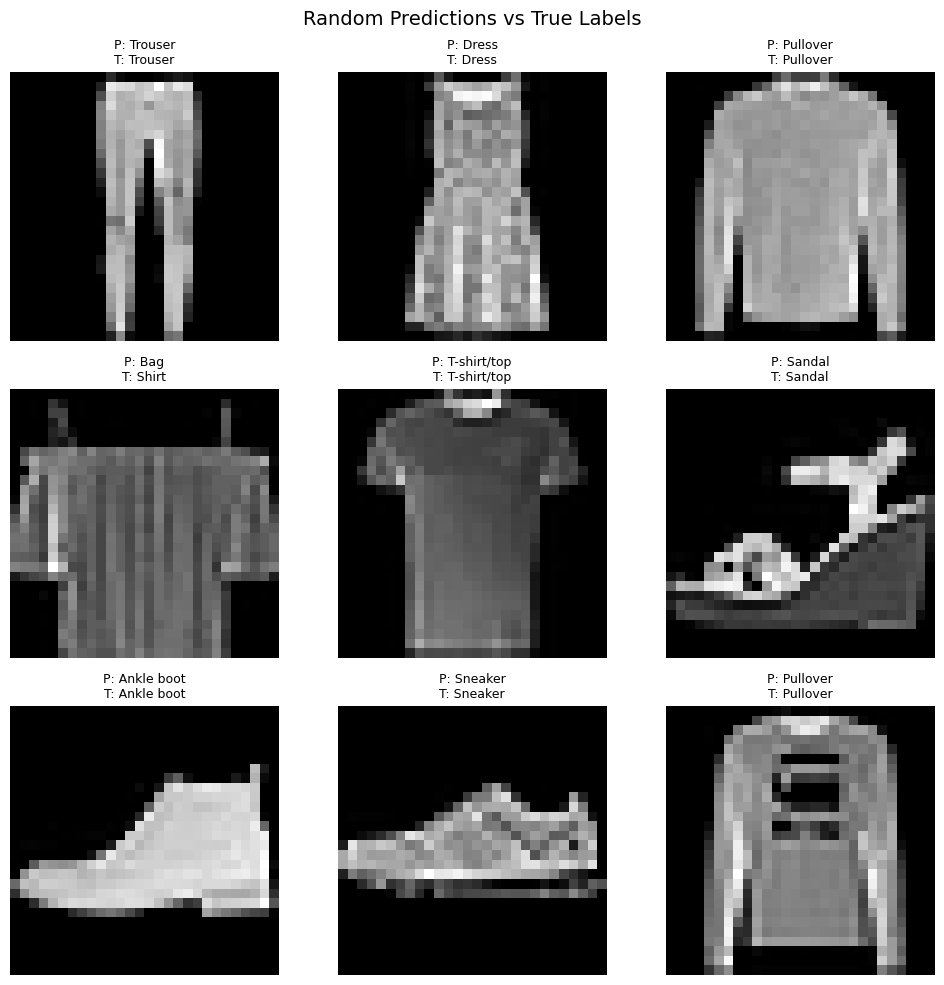

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def show_random_predictions(model, testset, classes, num_images=9, device='cpu'):
    model.eval()  # Set model to evaluation mode

    # Randomly select indices from the dataset
    indices = np.random.choice(len(testset), num_images, replace=False)
    images = []
    labels = []

    for i in indices:
        img, label = testset[i]
        images.append(img)
        labels.append(label)

    # Stack images into a batch
    images_tensor = torch.stack(images).to(device)

    # Get predictions
    with torch.no_grad():
        outputs = model(images_tensor)
        _, preds = torch.max(outputs, 1)

    # Plot the images and predictions
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(int(np.sqrt(num_images)), int(np.sqrt(num_images)), i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f"P: {classes[preds[i]]}\nT: {classes[labels[i]]}", fontsize=9)
        plt.axis('off')
    plt.suptitle("Random Predictions vs True Labels", fontsize=14)
    plt.tight_layout()
    plt.show()

# Usage:
show_random_predictions(model, testset, classes, num_images=9)


### Advanced CNN Mechanics

This section highlights powerful enhancements used in CNNs to improve training stability, generalization, and interpretability.


#### 1. **Batch Normalization in CNNs**

**What It Is:**  
Batch Normalization (BN) normalizes the activations of a layer for each mini-batch. This reduces internal covariate shift and allows for faster, more stable training.

**Why It's Useful:**
- Reduces internal covariate shift
- Improves gradient flow
- Acts as a form of regularization

**Where to Use It:**  
Place BN **after the convolutional layer and before the activation function**:
```python
nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2)
)
```

**Note:** BatchNorm and Dropout can be used in the same network, but they should generally be **kept in separate stages**:
- **BN → Activation → Dropout** (if used)

**Pro Tip:** Add BN in deeper networks to reduce vanishing gradients and improve generalization.


#### 2. **Dropout in CNNs**

**What It Is:**  
Dropout randomly disables a subset of activations during training, forcing the network to build redundant, robust features.

**Why It's Useful:**
- Prevents overfitting
- Improves model generalization

**Where to Use It:**  
Primarily after dense (fully connected) layers, but can be used after conv layers too:
```python
nn.Sequential(
    nn.Conv2d(32, 64, 3),
    nn.ReLU(),
    nn.Dropout2d(0.3),
    nn.MaxPool2d(2)
)
```

> Use **Dropout after activation**, not before.

**Important:** Avoid applying Dropout during evaluation (e.g., `model.eval()` disables it automatically).


#### 3. **Data Augmentation for CNNs**

**What It Is:**  
Data augmentation artificially expands the training dataset by applying random transformations such as flips, rotations, and scaling.

**Why It's Useful:**
- Increases dataset diversity
- Makes the model robust to real-world variations
- Reduces overfitting

**Example (for Fashion MNIST):**
```python
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
```

**Best Practice:** Apply augmentation **only to training data**, not validation or test sets.


#### 4. **Visualizing Feature Maps**

**What It Is:**  
Feature maps represent intermediate outputs of a CNN and help visualize what the model is learning at each stage.

**Why It's Useful:**
- Improves understanding of feature extraction
- Helps diagnose training issues in early layers

**Simple Example:**
```python
import matplotlib.pyplot as plt

# Forward pass up to first conv layer
model.eval()
with torch.no_grad():
    feature_maps = model.conv1(images)

# Visualize first few channels
for i in range(6):
    plt.imshow(feature_maps[0, i].numpy(), cmap='gray')
    plt.title(f'Feature Map {i+1}')
    plt.axis('off')
    plt.show()
```



These techniques are essential tools for improving CNN training, performance, and interpretability — helping learners move from basic to more advanced deep learning skills.



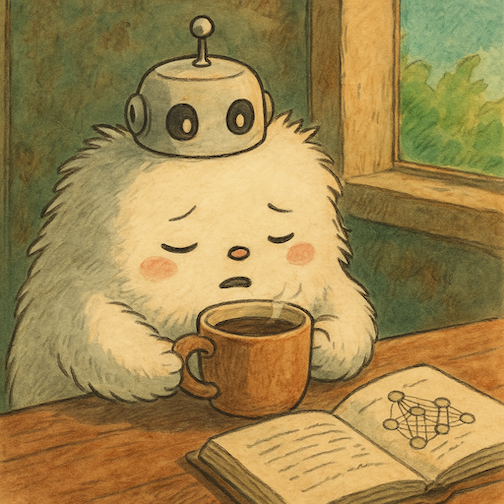

**☕🎶A Random Joke to Keep You (and Your CNN) Going**

My CNN tried to predict if I was happy... but it overfit to my coffee consumption, the number of Studio Ghibli soundtracks I played, and how many times I yelled ‘why won’t you converge?!’ at my laptop.

Moral of the story? Don’t let your model learn too much about your mental breakdowns — just give it the data it asked for.

That joke and image are your brain break. Now let’s get back to CNN training.

## Visualizing Filters Before and After Training

The following code demonstrates visually **how CNN filters evolve** during training. You’ll see:
- What the filters look like **before** training (random and unstructured)
- How they change **after training** (more structured, pattern-sensitive)
- How the **feature maps** (intermediate activations) change accordingly


## Why Filters Still Matter After Training in CNNs

#### 🟡 Before Training:
- Filters are **randomly initialized** (usually small random numbers).
- They do **not yet detect anything meaningful** — they are just noise.

#### 🔵 During Training:
- Filters are **learned through backpropagation**.
- They adjust to capture useful patterns like **edges**, **textures**, or **shapes**.
- These filters become increasingly specialized as training progresses.

#### 🟢 After Training:
- Filters are **fixed** — no longer updated.
- They are used in **inference (prediction)** to extract features from new images.
- These learned patterns help the model recognize and classify unseen data.


### Why Filters Are Still Needed After Training

Even after the training phase is over:
- The model **still uses those filters** to process incoming images.
- Without filters, the model wouldn’t know **what patterns to look for**.
- They are like a camera lens the model has fine-tuned — now used to recognize what it has learned.


### 📷 Real-World Analogy
Imagine you're teaching a robot how to recognize animals:
- **Training** is like giving it examples and helping it adjust its camera focus.
- Once trained, the robot uses that focus (filters) to spot patterns and make predictions.

So, the **filters are the robot's learned visual skills**, and you definitely still need them **after learning**!


### Summary
| Phase         | What Happens to Filters       | Do We Need Them? |
|---------------|-------------------------------|------------------|
| Before        | Random, untrained             | Yes (need to train) |
| During        | Learn useful patterns          | Yes (actively learning) |
| After         | Fixed, used for prediction     | Yes (critical for inference) |


**Conclusion:** Filters are the core of what a CNN learns — and they remain essential long after training ends. They are what enable your model to detect meaningful features and perform accurate predictions on real-world data.



🔍 Filters BEFORE Training:


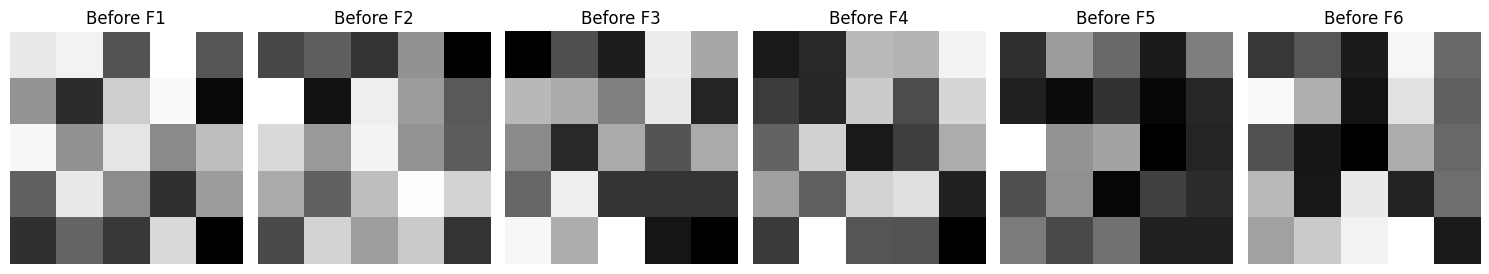

🔍 Feature Maps BEFORE Training:


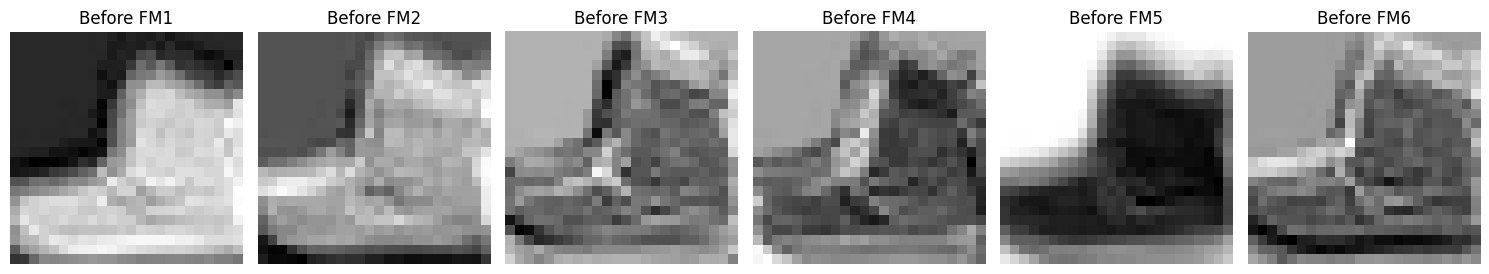


🏋️ Training model for 5 epochs...

Epoch 1 done.
Epoch 2 done.
Epoch 3 done.
Epoch 4 done.
Epoch 5 done.

🔍 Filters AFTER Training:


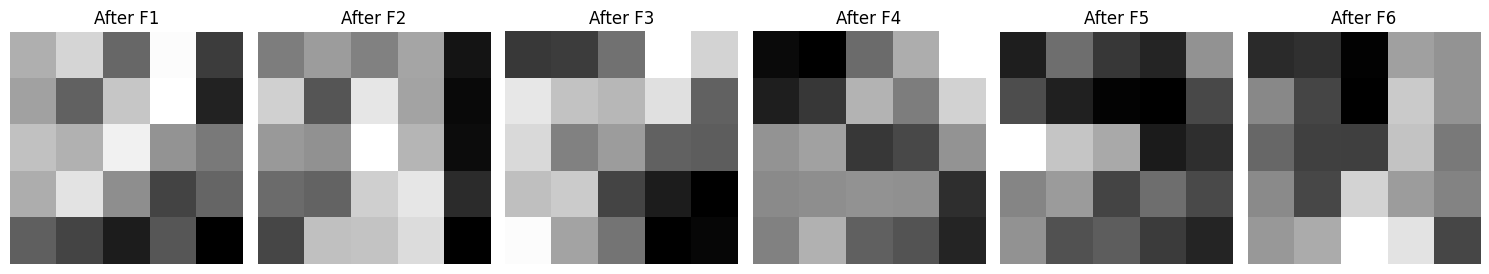

🔍 Feature Maps AFTER Training:


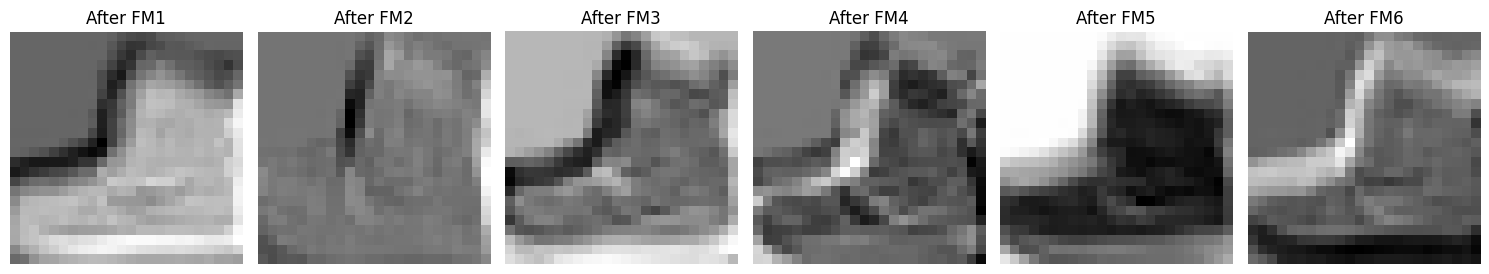

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Set seed for reproducibility
torch.manual_seed(42)

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # 6 filters, 5x5 kernel
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(6 * 12 * 12, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = x.view(-1, 6 * 12 * 12)
        x = self.fc(x)
        return x

# Load Fashion MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
sample_img, _ = trainset[0]
sample_img = sample_img.unsqueeze(0)  # Shape: [1, 1, 28, 28]

# Initialize model
model = SimpleCNN()

# ---- Function to visualize filters ----
def visualize_filters(model, title_prefix=""):
    weights = model.conv1.weight.data.clone().cpu()

    fig, axs = plt.subplots(1, weights.shape[0], figsize=(15, 3))
    for i in range(weights.shape[0]):
        axs[i].imshow(weights[i][0], cmap='gray')
        axs[i].set_title(f'{title_prefix} F{i+1}')
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()
    plt.close(fig)

# ---- Function to visualize feature maps ----
def visualize_feature_maps(model, image, title_prefix=""):
    model.eval()
    with torch.no_grad():
        fmap = model.conv1(image)

    fmap = fmap.cpu()
    fig, axs = plt.subplots(1, fmap.shape[1], figsize=(15, 3))
    for i in range(fmap.shape[1]):
        fmap_img = fmap[0, i].detach().numpy()
        # Normalize for better contrast
        fmap_img = (fmap_img - fmap_img.min()) / (fmap_img.max() - fmap_img.min() + 1e-5)
        axs[i].imshow(fmap_img, cmap='gray')
        axs[i].set_title(f'{title_prefix} FM{i+1}')
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()
    plt.close(fig)

# ---- BEFORE Training ----
print("🔍 Filters BEFORE Training:")
visualize_filters(model, title_prefix="Before")

print("🔍 Feature Maps BEFORE Training:")
visualize_feature_maps(model, sample_img, title_prefix="Before")

# ---- Training ----
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print("\n🏋️ Training model for 5 epochs...\n")
model.train()
for epoch in range(5):
    for images, labels in trainloader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} done.")

# ---- AFTER Training ----
print("\n🔍 Filters AFTER Training:")
visualize_filters(model, title_prefix="After")

print("🔍 Feature Maps AFTER Training:")
visualize_feature_maps(model, sample_img, title_prefix="After")


### Why This Is Cool (and Important!)
- This makes neural networks feel **less like a black box**.
- You can actually **see learning happen** by comparing before vs after.
- It's a great way to understand how CNNs work: they start with nothing, and learn to "look" at useful features.



## Deep CNN Architectures Overview

In this section, we provide an overview of several landmark deep CNN architectures that have significantly shaped the evolution of computer vision. These architectures not only improved accuracy but also introduced novel techniques that are now fundamental in deep learning.


### 🏛️ LeNet-5 – The Pioneer (1998)

**LeNet-5** was developed by Yann LeCun for handwritten digit recognition (MNIST dataset). It was one of the first successful CNNs and laid the foundation for modern architectures.

- **Architecture Highlights:**
  - Two convolutional layers with tanh activations
  - Subsampling (average pooling) layers
  - Fully connected layers at the end
- **Total Layers:** 7 (5 trainable + 2 non-trainable)
  - **Trainable:** C1, C3, C5, F6, Output (have weights/biases)
  - **Non-trainable:** S2 and S4 (pooling layers without learnable parameters)
- **Use Case:** Digit classification, simple grayscale images

**Key Contribution:** Introduced the concept of hierarchical feature learning by stacking convolution and pooling layers, leading to a structured pipeline of feature extraction and classification.

LeNet-5 remains a go-to educational architecture for learning how CNNs work at a foundational level.

In [ ]:
from IPython.display import HTML

HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/3/35/LeNet-5_architecture.svg" width="800"/>')


## 🧱 Understanding Trainable Layers in LeNet-5

LeNet-5 is a foundational CNN architecture introduced in 1998 by Yann LeCun for handwritten digit recognition. It consists of a series of convolutional, pooling, and fully connected layers.

> ✨ **LeNet-5 has a total of 7 layers: 5 trainable and 2 non-trainable.**

Let’s clarify exactly what this means.


### 🎯 What Are Trainable Layers?
Trainable layers are layers with **learnable parameters** — specifically **weights and biases**. These parameters are updated during training via backpropagation.

Pooling or subsampling layers, on the other hand, **do not have learnable parameters**, so they are *not* considered trainable.


### 🔍 Breakdown of LeNet-5 Layers

| Layer Name | Type              | Description                                | Trainable? |
|------------|-------------------|--------------------------------------------|------------|
| C1         | Convolutional     | 6 filters of size 5×5                     | ✅ Yes      |
| S2         | Subsampling       | Average pooling layer                       | ❌ No       |
| C3         | Convolutional     | 16 filters (partially connected)           | ✅ Yes      |
| S4         | Subsampling       | Average pooling again                       | ❌ No       |
| C5         | Convolutional     | 120 feature maps (fully connected to S4)   | ✅ Yes      |
| F6         | Fully Connected   | 84 neurons                                  | ✅ Yes      |
| Output     | Fully Connected   | 10 neurons (classification layer)          | ✅ Yes      |


### Total = 5 Trainable Layers
According to the table above, the **trainable layers are**:
- **C1, C3, C5** (Convolutional)
- **F6, Output** (Fully Connected)

This makes a total of **5 trainable layers**.

So where does the number **7** sometimes come from?
- Some sources count **each set of weights and biases** as separate trainable components.
- Or they might count **input-to-C1 and Output-to-softmax** mappings separately.

However, based strictly on **unique layers with parameters**, the number is **5 trainable layers**, and the total number of **distinct layers** is **7**.


### 📅 Summary
| Layer Type        | Count | Learnable?     |
|-------------------|-------|----------------|
| Convolutional     | 3     | ✅ Yes         |
| Subsampling       | 2     | ❌ No          |
| Fully Connected   | 2     | ✅ Yes         |
| **Total Layers**      | **7**   | ⭐ 5 Trainable + 2 Non-Trainable |

LeNet-5 has **5 distinct trainable layers** when counting only layers with weights and biases. Understanding this helps clarify which parts of your model actually "learn" and which simply process data.



### 🧠 AlexNet – The Game Changer (2012)

**AlexNet**, developed by **Alex Krizhevsky**, **Ilya Sutskever**, and **Geoffrey Hinton**, won the ImageNet challenge in 2012 and marked the beginning of the deep learning revolution in computer vision. It demonstrated the power of training deep networks on large datasets with GPUs.

- **Architecture Highlights:**
  - 5 convolutional layers, followed by 3 fully connected layers
  - Introduced **ReLU** activation (much faster than tanh/sigmoid)
  - Used **Dropout** for regularization
  - Trained on **two GPUs** in parallel
- **Input:** 224x224 RGB images
- **Use Case:** Large-scale image classification

**Key Contribution:** Showed that deeper networks + ReLU + GPU training can outperform traditional methods by a huge margin. This architecture was the turning point that pushed CNNs to the forefront of modern AI research and applications.



In [ ]:
from IPython.display import HTML

HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Comparison_image_neural_networks.svg" width="600"/>')


**Why Does AlexNet Output 1 to 1000 Classes?**

When you see "1 to 1000 classes" written under **AlexNet**, it refers to the **number of output classes** that the model was originally trained to recognize.


### 🌐 Trained on the ImageNet Dataset
**AlexNet** was developed to compete in the **ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2012**. This competition used the **ImageNet dataset**, which contains:

- **Over 1.2 million training images**
- **1,000 object categories** (such as dogs, cats, cars, chairs, etc.)


### 🤖 What Does "1 to 1000" Mean?
The model's **final layer** is a fully connected layer with **1,000 output neurons**. Each neuron corresponds to one of the 1,000 object classes in the ImageNet dataset.

So, when an image is passed through AlexNet:
- The output is a **vector of 1,000 values**
- Each value represents the model's **confidence** that the image belongs to a specific class
- The model chooses the class with the **highest score** as its prediction


### 🔢 Example:
If the output looks like this:
```python
[0.01, 0.002, ..., 0.95, ..., 0.0003]
```
Then the class with the **0.95** score is the model's prediction.

Note: These numbers are logits, which are the raw scores output by AlexNet’s final fully connected layer. They are not probabilities and do not sum to 1. To convert them into probabilities, you must apply softmax manually (usually during inference).


### 🔄 Can You Use AlexNet for Other Tasks?
Yes! You can **modify AlexNet** to classify a different number of classes:

- Replace the last fully connected layer with one that has, say, **10 outputs** if you're working on something like CIFAR-10 or Fashion MNIST.
- This is commonly done in **transfer learning**.


So, the "1 to 1000 classes" in AlexNet just means: "This model outputs predictions across 1,000 categories — one for each ImageNet class."


Note: In modern deep learning frameworks like PyTorch, we typically do not include a softmax layer at the end of the model when using CrossEntropyLoss. This is because CrossEntropyLoss internally applies both softmax and log, making it more numerically stable. Therefore, the final layer of the model should output raw logits, and softmax should only be applied manually during inference if you need probabilities.

### 🛡️ VGGNet – Deep but Simple (2014)

**VGGNet**, developed by **Karen Simonyan** and **Andrew Zisserman** of the **Visual Geometry Group at Oxford**, became widely known for its simplicity and effectiveness. It focused on architectural elegance by using **only 3×3 convolutions** stacked deeply to increase depth.

- **Variants:** VGG-11, VGG-16, VGG-19 (based on number of layers)
- **Architecture Highlights:**
  - Stacks of 3×3 convolution layers with stride 1 and padding 1
  - Max pooling layers for downsampling
  - Fully connected layers at the end
- **Use Case:** Image classification, and widely adopted for **feature extraction** and **transfer learning**

**Key Contribution:** Demonstrated that **depth matters**. Replacing large convolution kernels with multiple stacked 3x3 filters could achieve a similar receptive field, while being more efficient, modular, and expressive.

**Competition Performance:**
- **VGGNet (especially VGG-16 and VGG-19)** was one of the top-performing models in the **ILSVRC 2014** classification task.
- It finished **second**, just behind **GoogLeNet (Inception v1)** from Google.

Despite not winning, VGGNet's influence has been massive — it set a new standard for deep CNN design and remains widely used in research and applications today.


✅ What does “stacked” mean?
Instead of using a single wide filter (like 11×11), VGG uses several 3×3 filters in a row. Stacking them increases the receptive field (what the neuron “sees”), while keeping the architecture efficient and modular. VGG reduces parameters by stacking multiple small filters instead of using one large filter, while also gaining more non-linearity (via ReLUs after each layer). This leads to deeper, more powerful networks that are still efficient.



In [ ]:
from IPython.display import HTML

HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/0/00/VGG_module_architecture.svg" width="500"/>')

### ♻️ ResNet – Residual Learning (2015)

**ResNet (Residual Network)** was developed by **Kaiming He**, **Xiangyu Zhang**, **Shaoqing Ren**, and **Jian Sun** at Microsoft Research. It introduced the concept of **skip (residual) connections**, which allowed networks to become *very* deep (up to 152 layers!) without suffering from vanishing gradients.

A skip connection adds the input of a layer directly to its output, allowing the network to learn **residuals** instead of full transformations. In a residual block, the input `x` is added directly to the transformed output `F(x)`, resulting in:

```
output = F(x) + x
```

- **Architecture Highlights:**
  - Residual blocks: `output = F(x) + x`
  - Identity shortcuts to skip layers
  - Batch normalization used extensively
- **Variants:** ResNet-18, ResNet-34, ResNet-50, ResNet-101, ResNet-152
- **Use Case:** Image classification, detection, segmentation, and feature learning

**Key Contribution:** Made it possible to train **very deep networks** reliably. Residual learning is now a foundational concept in most modern architectures.

**Competition Performance:**
- **ResNet-152** won **1st place** in the **ILSVRC 2015** classification task.
- It achieved a **top-5 error rate of just 3.57%**, outperforming all previous models and setting a new benchmark in computer vision.

ResNet's innovative use of identity shortcuts became the blueprint for many future networks, proving that deeper can also be better *and* trainable.


In [ ]:
from IPython.display import HTML

HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/b/b3/ResNet_block.svg" width="500"/>')

### 🔀 Inception – Multi-Scale Vision (2014–2016)

**Inception**, also known as **GoogLeNet**, was developed by **Christian Szegedy** and his team at **Google Research**. It introduced the concept of **multi-path feature extraction** within a single block, allowing the network to process visual information at multiple spatial scales simultaneously.

- **Architecture Highlights:**
  - Inception modules that apply **1x1**, **3x3**, and **5x5** convolutions **in parallel**
  - Uses **1x1 convolutions for dimensionality reduction**, making the model more efficient
  - Later versions (Inception-v2, v3, v4) include **batch normalization**, **factorized convolutions**, and **residual connections** (in Inception-ResNet)
- **Use Case:** Image classification, object detection, localization, action recognition

**Key Contribution:** Efficiently captured **multi-scale features** while minimizing computational cost. The architecture introduced **modular design**, where each Inception block acts like a mini-network, and helped scale models efficiently.

**Competition Performance:**
- **GoogLeNet (Inception v1)** won **1st place** in the **ILSVRC 2014** classification challenge.
- It achieved a **top-5 error rate of 6.67%**, beating VGGNet while using significantly fewer parameters.

Inception’s modular, multi-branch design was groundbreaking at the time and continues to influence lightweight and scalable architecture design today.


In [ ]:
from IPython.display import HTML

HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Inception-v3_model.png" width="1000"/>')

In [ ]:
from IPython.display import HTML

HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/5/57/Inception-v3_model_module.png" width="800"/>')

### 🧬 U-Net – Segmentation Specialist (2015)

**U-Net** was developed by **Olaf Ronneberger**, **Philipp Fischer**, and **Thomas Brox** at the University of Freiburg. It was specifically designed for **biomedical image segmentation**, where precise localization is crucial.

- **Architecture Highlights:**
  - Symmetrical **encoder-decoder** (U-shaped) structure
  - **Skip connections** from encoder to decoder layers
  - Enables fine-grained, spatially accurate segmentation
- **Use Case:** Medical imaging, satellite imagery, and other **pixel-wise prediction tasks**

**Key Contribution:** U-Net became a go-to architecture for **pixel-level prediction tasks**. Its use of skip connections allows it to combine low-level spatial detail with high-level semantic information, making it ideal for applications where both the "what" and the "where" matter.

**How it Works:**
- The **encoder** compresses the image, capturing context and "what" is in the image.
- The **decoder** upsamples the compressed representation to recover "where" the objects are.
- **Skip connections** pass high-resolution features directly from encoder to decoder, preserving spatial accuracy.

**Recognition:**
- Although U-Net was not part of ILSVRC (it focused on segmentation, not classification), it became one of the most **widely cited architectures in medical AI research** and won attention in the **ISBI Cell Tracking Challenge (2015)**.

U-Net's elegant design and high performance have made it a gold standard for semantic segmentation tasks in both academia and industry.

In [ ]:
from IPython.display import HTML

HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/2/2b/Example_architecture_of_U-Net_for_producing_k_256-by-256_image_masks_for_a_256-by-256_RGB_image.png" width="800"/>')

### 📱 MobileNet – Lightweight & Efficient (2017)

**MobileNet** was developed by researchers at **Google**, including **Andrew G. Howard** and **Menglong Zhu**, to address the need for fast, efficient neural networks that can run on **mobile and embedded devices**. It focuses on minimizing computation and memory usage while preserving respectable accuracy.

- **Architecture Highlights:**
  - Uses **depthwise separable convolutions** to dramatically reduce computation
  - Prioritizes low parameter count and small model size
  - Easily tunable using **width** and **resolution multipliers** to trade off accuracy for speed
- **Variants:** MobileNetV1, V2 (with inverted residuals), and V3 (with NAS and squeeze-and-excitation)
- **Use Case:** On-device AI, real-time inference, mobile apps, edge computing

**Key Contribution:** Brought efficient CNNs to mobile and edge devices, enabling **on-device AI** with limited resources. MobileNet helped shift the focus toward **practical, deployable deep learning models**.

**How Depthwise Separable Convolutions Work:**
- **Depthwise convolution** applies one filter per input channel — capturing spatial patterns independently.
- **Pointwise convolution** (a 1×1 convolution) then combines the output across all channels to learn interactions.

Depthwise separable convolutions are a way to make convolutional neural networks faster and more efficient by splitting a standard convolution into two simpler steps. First, the depthwise convolution applies one filter to each input channel separately. This means that instead of combining all the channels at once, the model focuses on learning patterns within each individual channel—like detecting edges or textures in just the red, green, or blue part of an image.

Then, the pointwise convolution, which is just a 1×1 convolution, takes the outputs from the depthwise step and combines them across all the channels. This helps the network learn how different features interact with each other.

In simple terms, the depthwise step looks at each feature channel on its own, and the pointwise step mixes everything together to understand the bigger picture. This approach is used in models like MobileNet because it reduces the number of calculations and speeds up training, all while keeping good performance.

This reduces computation and parameters by a factor of 8–9 compared to standard convolutions, without a major drop in performance.

**Impact:**
- While MobileNet did not compete in ILSVRC, it **redefined what deep learning could do on-device**.
- Its efficiency made it a favorite for real-time mobile apps like **object detection, face recognition, and AR**.

MobileNet's design inspired many other lightweight architectures and remains a cornerstone in the development of efficient neural networks for deployment.

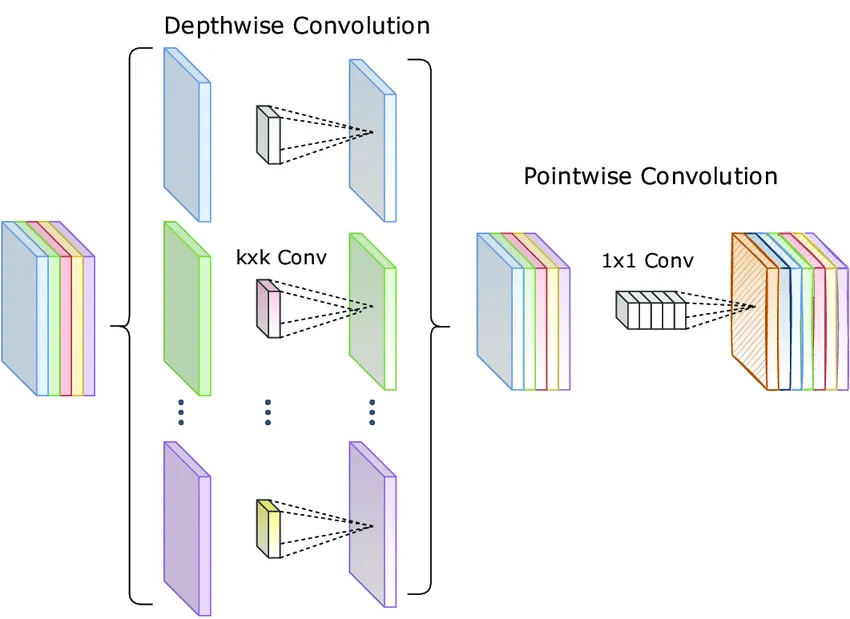

Ref: https://medium.com/@pandrii000/mobilenet-architectures-17fe7406d794

### 🧬 DepthNet – Lightweight MRI Classifier (2024)

**DepthNet** is a deep convolutional neural network developed by **Pegah Khosravi** and the **BioMind AI Lab**, specifically designed for efficient and scalable biomedical image analysis, with a focus on **MRI-based classification**.

- **Architecture Highlights:**
  - Employs **depthwise separable convolutions** in four modular blocks to reduce parameter count while maintaining rich feature representation
  - Each block includes **batch normalization**, **ReLU activation**, and **max pooling**
  - Ends with fully connected layers and a **60% dropout rate** to minimize overfitting
  - Optimized for **binary classification** (e.g., effective vs. ineffective treatment), but easily extendable to multi-class scenarios
  - Designed to run smoothly on both **CPU and GPU**, making it deployment-friendly

- **Input Size:** High-resolution **512x512** MRI scans

- **Training Features:**
  - Uses **early stopping** to avoid overfitting
  - Incorporates **extensive data augmentation**, real-time **performance monitoring**, and **patient-level voting** for robust and clinically relevant predictions

- **Evaluation Tools:** ROC curve, confusion matrix, and classification metrics such as accuracy, sensitivity, and specificity

**Key Contribution:**
DepthNet strikes a compelling balance between **performance and efficiency** in medical imaging. By leveraging **depthwise separable convolutions** and smart training techniques, it delivers strong classification results with fewer parameters — ideal for clinical settings with limited compute but high demands for precision.

**Fun Fact:**
Although DepthNet arrived after the ILSVRC era had ended, if such a category had existed, it might have entered saying:

>“I didn’t come here to classify — I came here to diagnose.”  
Some models chase benchmarks. Others change lives. 🩺😎



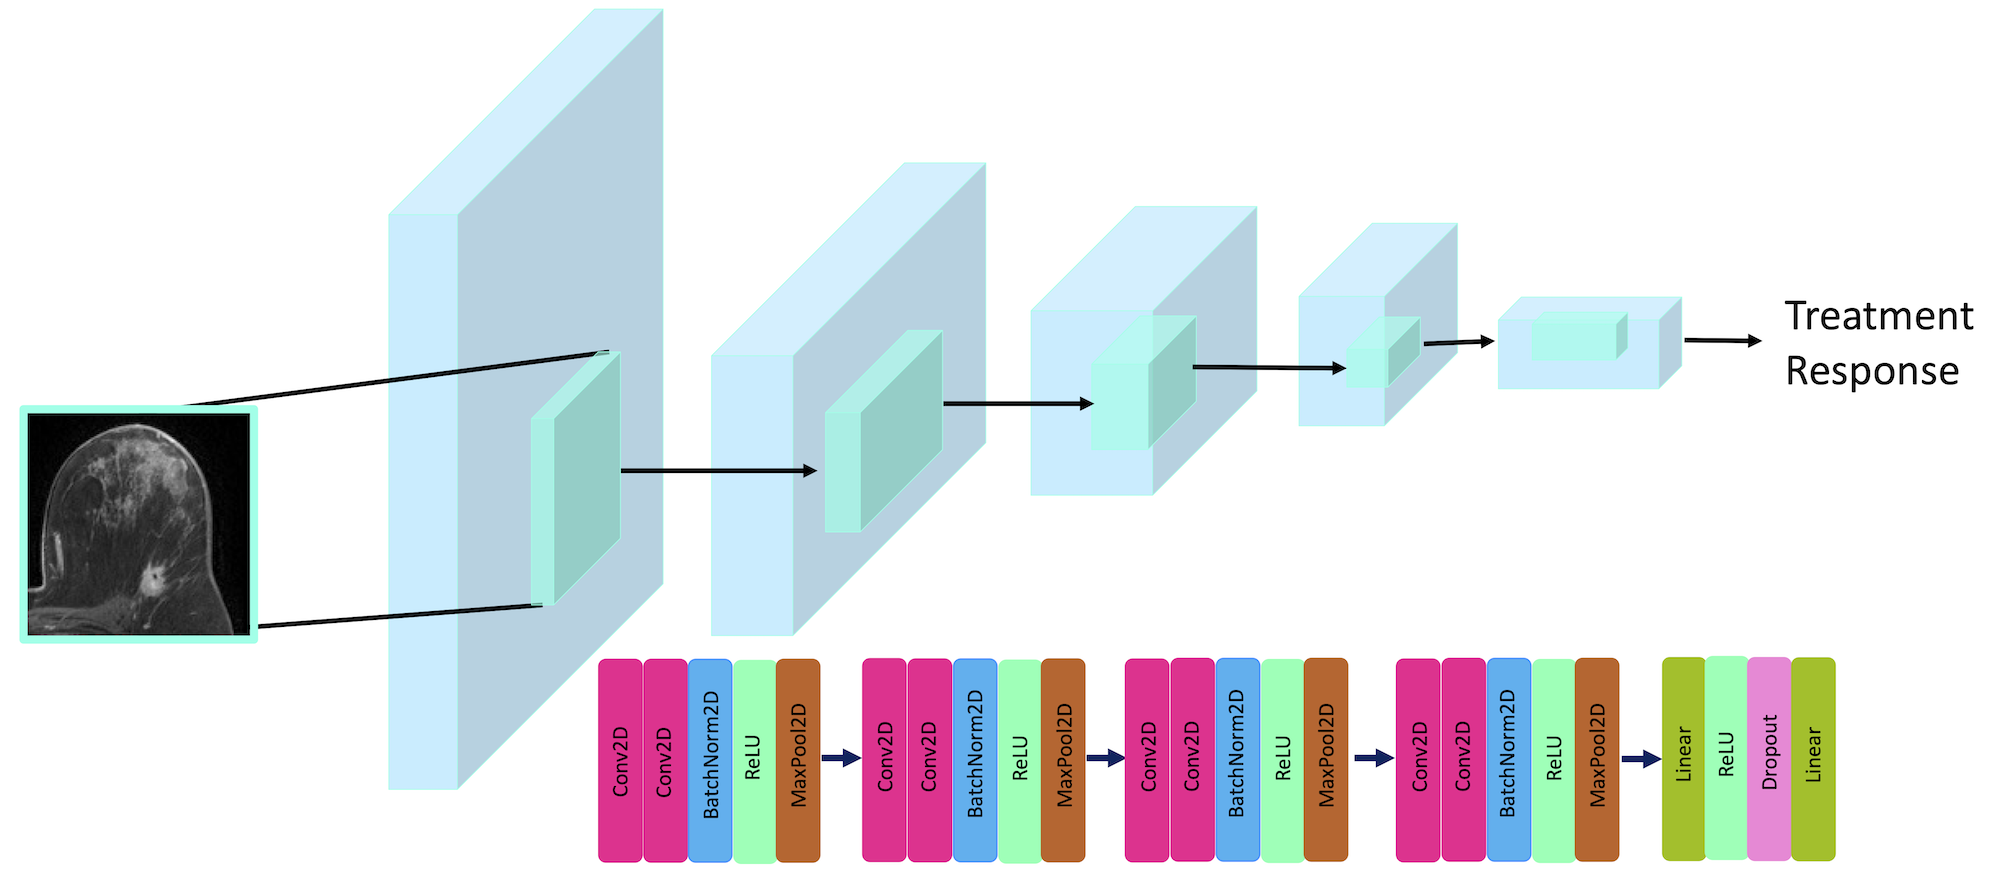

Ref: https://github.com/PKhosravi-CityTech/DepthNet

## 🏋️‍♂️ Model Training Strategies in Deep Learning

When building deep learning models, there are **two main training strategies**:


### 🔹 1. Training From Scratch

**Definition**: Build and train a model **with randomly initialized weights** on your dataset.

**Use When**:
- You have **lots of labeled data**
- The task is **very different** from existing models (e.g., medical imaging, scientific data)

**Pros**:
- Full control over architecture
- Tailored perfectly to your specific task

**Cons**:
- Requires **a lot of data** and compute
- Takes **longer to converge**
- Risk of overfitting if data is limited

**Code Example**:
```python
model = YourCustomModel()
# No pre-trained weights — trained from scratch
```


### 🔹 2. Transfer Learning

**Definition**: Use a **pre-trained model** (e.g., ResNet, MobileNet) trained on a large dataset (like ImageNet) and **adapt it** to your task.

**Use When**:
- You have **limited data**
- Your problem is **similar to what the model was trained on** (e.g., natural images)

#### 🔸 Two Variants (of Transfer Learning):

### **a. Feature Extraction (Freeze Base)**

**What it is**: You use the pre-trained model **as a fixed feature extractor**. That means:
- You keep all the pre-trained weights of the model's base layers (like convolutional layers in ResNet)
- These layers do **not** update during training
- You only **replace and train the classifier head** (e.g., a fully connected layer at the end)

**Why use it?**
- The base model already knows how to extract useful visual features (like edges, shapes, textures)
- You just need to teach it how to classify **your new classes**

**Code Example:**
```python
from torchvision import models
import torch.nn as nn

model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Replace the final layer
model.fc = nn.Linear(model.fc.in_features, num_classes)
```

**When to use**:
- Small dataset
- Similar task (e.g., new flower types, dog breeds)

Note: You might wonder how a model pre-trained on ImageNet — which contains everyday objects like dogs, trucks, and chairs — could still perform well on something totally different, like medical images. The answer lies in transfer learning. The early layers of a CNN don’t learn domain-specific objects; they learn general visual features like edges, corners, textures, and simple shapes. These low-level patterns are common across all kinds of images, including MRIs, X-rays, and CT scans. So even if the model has never seen a tumor before, it already knows how to detect the basic structures that compose one. By freezing the base (pre-trained layers) and only training a new classifier head, you’re leveraging this existing visual intelligence and only teaching the model how to make new decisions for your specific task — like detecting a disease or classifying treatment response.


### **b. Fine-Tuning (Unfreeze Some Layers)**

**What it is**: After doing feature extraction, you "unfreeze" some of the later layers and **allow them to be retrained**.

This helps the model adapt more deeply to your specific task, especially if it's slightly different from what it was trained on.

**You’re telling the model:**
> “You already know general image features... now tweak a few layers to better suit my problem.”

**Code Example:**
```python
from torchvision import models
import torch.nn as nn

model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# First, freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Then, unfreeze last block (e.g., layer4 in ResNet18)
for param in model.layer4.parameters():
    param.requires_grad = True

# Replace classifier head as needed
model.fc = nn.Linear(model.fc.in_features, num_classes)
```

**When to use**:
- Medium-sized dataset
- The task is somewhat different
- You want better accuracy than feature extraction alone

Note: Fine-tuning builds on top of feature extraction by not just using the pre-trained model’s base layers, but actually allowing some of them to be retrained. You still take advantage of the general visual features learned from ImageNet (like edges and textures), but now you unfreeze a few of the later layers — especially those that learn higher-level patterns — and allow them to adapt to your new data. This is especially helpful when your task is a bit different from what the model was originally trained on. For example, medical images might have patterns that don’t appear in everyday objects. By fine-tuning, you're essentially telling the model: “You already know how to see — now sharpen your focus for this specific job.” This approach tends to work well with medium-sized datasets and can give you better performance than feature extraction alone.


### Summary Table

| Strategy              | Data Needed | Training Time | Use Case                              |
|-----------------------|-------------|----------------|----------------------------------------|
| From Scratch          | High        | Long           | When task is unique, data is abundant |
| Transfer Learning     | Low–Medium  | Short          | When task is related to known domains |
| └ Feature Extraction  | Low         | Fastest        | Fast training, less compute           |
| └ Fine-tuning         | Medium      | Moderate       | Better accuracy, more flexible        |


Transfer learning is applicable to CNNs, RNNs, Transformers, Fully Connected DNNs. It's just most popular in CNNs because of the large pretrained models available for vision tasks.

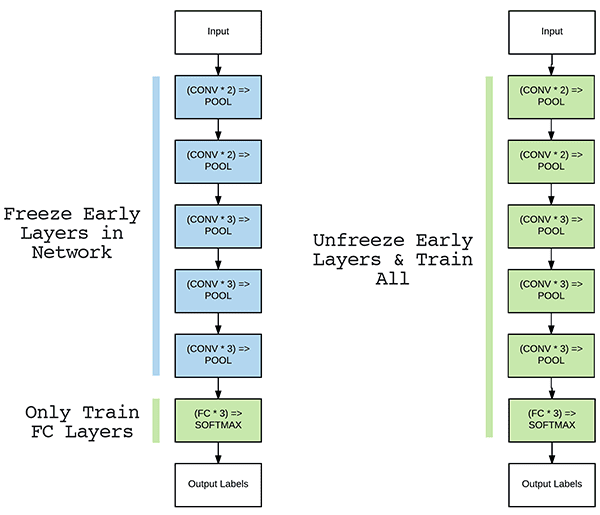

Ref: https://pyimagesearch.com/2019/06/03/fine-tuning-with-keras-and-deep-learning/

The code below demonstrates transfer learning using the PyTorch deep learning framework with a pre-trained ResNet18 model applied to the Oxford Flowers102 dataset. ResNet18, originally trained on ImageNet, is a convolutional neural network known for its use of residual (skip) connections to enable deeper architectures without vanishing gradients. In this workflow, we leverage the model’s ability to extract general visual features by freezing the base layers and replacing the final fully connected layer with a new classifier specific to the 102 flower classes. The dataset is split into training and validation sets, and images are preprocessed using standard normalization techniques aligned with ImageNet. The training procedure includes loss tracking, accuracy evaluation, and saving the best-performing model. Finally, the trained model is used to classify new flower images from URLs, demonstrating real-world inference. This approach shows how to efficiently adapt a powerful general-purpose CNN to a domain-specific task with limited training data.

In [ ]:
# Transfer Learning in PyTorch with Pre-trained Models (ResNet18 on Flowers102)

# ----------------------------------------
# Section 1: Setup and Imports
# ----------------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torchvision.datasets import Flowers102
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import time
import os
import copy
from PIL import Image, UnidentifiedImageError
import requests
from io import BytesIO

# Check if GPU is available and use it if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ----------------------------------------
# Section 2: Load and Preprocess Flowers102 Dataset
# ----------------------------------------
# Define preprocessing transforms for training/validation/testing
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Download Flowers102 dataset using the "train" and "test" splits
full_dataset = Flowers102(root="./data", split="train", transform=transform, download=True)
test_dataset = Flowers102(root="./data", split="test", transform=transform, download=True)

# Get class names from the dataset (mapped manually from official list)
# This list is taken from official Oxford Flowers 102 class names
class_names = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells", "sweet pea", "english marigold",
    "tiger lily", "moon orchid", "bird of paradise", "monkshood", "globe thistle", "snapdragon",
    "colt's foot", "king protea", "spear thistle", "yellow iris", "globe-flower", "purple coneflower",
    "peruvian lily", "balloon flower", "giant white arum lily", "fire lily", "pincushion flower",
    "fritillary", "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers",
    "stemless gentian", "artichoke", "sweet william", "carnation", "garden phlox", "love in the mist",
    "mexican aster", "alpine sea holly", "ruby-lipped cattleya", "cape flower", "great masterwort",
    "siam tulip", "lenten rose", "barbeton daisy", "daffodil", "sword lily", "poinsettia",
    "bolero deep blue", "wallflower", "marigold", "buttercup", "oxeye daisy", "common dandelion",
    "petunia", "wild pansy", "primula", "sunflower", "pelargonium", "bishop of llandaff",
    "gaura", "geranium", "orange dahlia", "pink-yellow dahlia?", "cautleya spicata",
    "japanese anemone", "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
    "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania", "azalea",
    "water lily", "rose", "thorn apple", "morning glory", "passion flower", "lotus", "toad lily",
    "anthurium", "frangipani", "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow",
    "magnolia", "cyclamen", "watercress", "canna lily", "hippeastrum", "bee balm", "ball moss",
    "foxglove", "bougainvillea", "camellia", "mallow", "mexican petunia", "bromelia",
    "blanket flower", "trumpet creeper", "blackberry lily"
]

# Split the full dataset into training and validation
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Create data loaders
loader = {
    'train': DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2),
    'val': DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
}

num_classes = 102  # Flowers102 dataset has 102 classes

# ----------------------------------------
# Section 3: Load Pre-trained Model and Modify Classifier
# ----------------------------------------
# Load a pre-trained ResNet18 model
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)  # Updated to avoid deprecation warning

# Freeze all layers except the final classification head
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer to match the number of flower classes
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move the model to the selected device
model = model.to(device)

# ----------------------------------------
# Section 4: Define Loss Function and Optimizer
# ----------------------------------------
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

# ----------------------------------------
# Section 5: Training Function
# ----------------------------------------
def train_model(model, criterion, optimizer, dataloaders, num_epochs=10):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print("-" * 10)

        for phase in ['train', 'val']:
            model.train() if phase == 'train' else model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f"Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s")
    print(f"Best val Acc: {best_acc:.4f}")

    model.load_state_dict(best_model_wts)
    return model

# ----------------------------------------
# Section 6: Train the Model
# ----------------------------------------
model = train_model(model, criterion, optimizer, loader, num_epochs=10)

# ----------------------------------------
# Section 7: Save the Trained Model
# ----------------------------------------
torch.save(model.state_dict(), "finetuned_model.pth")
print("Model saved as 'finetuned_model.pth'")

Using device: cuda:0
Epoch 1/10
----------
train Loss: 4.6737 Acc: 0.0392
val Loss: 4.1635 Acc: 0.0833
Epoch 2/10
----------
train Loss: 3.3961 Acc: 0.3750
val Loss: 3.2709 Acc: 0.3676
Epoch 3/10
----------
train Loss: 2.4466 Acc: 0.7157
val Loss: 2.6188 Acc: 0.6225
Epoch 4/10
----------
train Loss: 1.7791 Acc: 0.8505
val Loss: 2.2241 Acc: 0.6765
Epoch 5/10
----------
train Loss: 1.3037 Acc: 0.9228
val Loss: 1.8804 Acc: 0.7304
Epoch 6/10
----------
train Loss: 0.9783 Acc: 0.9657
val Loss: 1.6305 Acc: 0.7598
Epoch 7/10
----------
train Loss: 0.7520 Acc: 0.9755
val Loss: 1.4825 Acc: 0.7941
Epoch 8/10
----------
train Loss: 0.5947 Acc: 0.9877
val Loss: 1.3847 Acc: 0.7941
Epoch 9/10
----------
train Loss: 0.4921 Acc: 0.9926
val Loss: 1.2669 Acc: 0.8137
Epoch 10/10
----------
train Loss: 0.3942 Acc: 0.9914
val Loss: 1.1942 Acc: 0.8284
Training complete in 0m 34s
Best val Acc: 0.8284
Model saved as 'finetuned_model.pth'


Predicted flower class: rose (index 73)


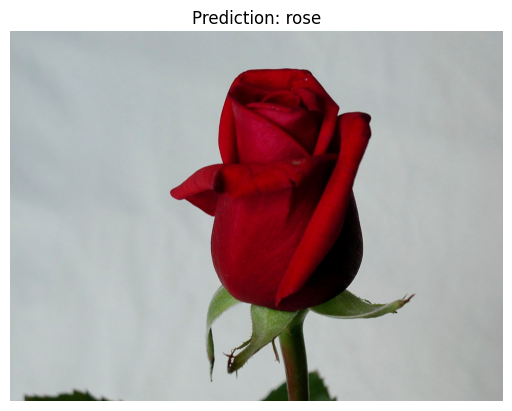

Predicted flower class: daffodil (index 41)


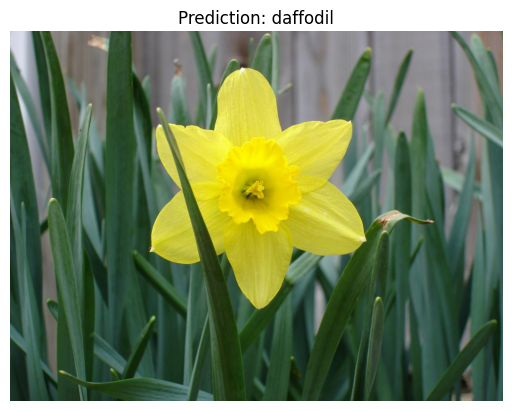

In [ ]:
# ----------------------------------------
# Section 8: Predict a Flower from Online Image URL
# ----------------------------------------

def predict_image_from_url(url):
    model.eval()
    try:
        headers = {"User-Agent": "Mozilla/5.0"}
        response = requests.get(url, headers=headers)
        img = Image.open(BytesIO(response.content)).convert("RGB")

        preprocess = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

        input_tensor = preprocess(img).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)
            _, predicted = torch.max(output, 1)

        predicted_class = predicted.item()
        class_name = class_names[predicted_class] if predicted_class < len(class_names) else f"Class {predicted_class}"

        print(f"Predicted flower class: {class_name} (index {predicted_class})")
        plt.imshow(img)
        plt.title(f"Prediction: {class_name}")
        plt.axis('off')
        plt.show()

    except UnidentifiedImageError:
        print(f"Error: Could not identify image from URL: {url}")
    except Exception as e:
        print(f"Unexpected error for URL {url}: {e}")

# ----------------------------------------
# Section 9: Run Predictions on Test URLs
# ----------------------------------------

test_urls = [
    "https://upload.wikimedia.org/wikipedia/commons/8/8b/Rose_flower.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/9/9a/Daffodil-flower.jpg"
]

for url in test_urls:
    predict_image_from_url(url)

## Train vs. Validation vs. Test/Prediction

A fundamental concept in machine learning. Here's the difference:

| **Concept**     | **Purpose**                                  | **When is it used?**             | **What happens?**                          |
|----------------|-----------------------------------------------|----------------------------------|--------------------------------------------|
| **Training**   | Teach the model to learn patterns             | During model training            | Model adjusts weights using data + labels  |
| **Validation** | Tune hyperparameters and monitor accuracy     | During training (after each epoch) | Model predicts on unseen data, but does **not** learn from it |
| **Test / Prediction** | Evaluate final model performance         | After training is complete       | Model predicts new data with **no learning** |


### 📊 Examples

- **Training Data**  
  "These are the flashcards we show the model to **learn from**."

- **Validation Data**  
  "We quiz the model to see how well it’s learning — **but don’t give it answers**."

- **Test / Prediction Data**  
  "This is the final exam! The model has **never seen this** before. It just gives its best guess."


### 🔁 In Our Code

```python
# Training phase
model.train()           # model is learning
# → loss.backward(), optimizer.step()

# Validation phase
model.eval()            # model is evaluated
# → no gradients, just predictions

# Test / Prediction phase
predict_image_from_url("image.jpg")
# → Use trained model to make a prediction on new data
```


✅ **Summary**
- **Train:** Learn
- **Validate:** Tune & check
- **Test/Predict:** Final evaluation

The code below demonstrates a transfer learning pipeline using the TensorFlow framework and a pre-trained InceptionV3 model for classifying colonoscopy images into four medical categories: Normal, Ulcerative Colitis, Polyp, and Esophagitis. The InceptionV3 model, originally trained on ImageNet, is used as a frozen feature extractor, meaning its base layers are not updated during training. A custom classification head is added on top and trained on a domain-specific dataset. The dataset is loaded from Google Drive, structured into training, validation, and test folders, and preprocessed using TensorFlow’s ImageDataGenerator. After training for 10 epochs, the model’s performance is evaluated using accuracy, loss curves, and a confusion matrix. Finally, the model predicts outcomes for specific test images, displaying both the actual and predicted class with confidence scores. This workflow showcases how a general-purpose CNN like InceptionV3 can be efficiently adapted to solve specialized medical imaging tasks using transfer learning.

Data Source: https://www.kaggle.com/datasets/francismon/curated-colon-dataset-for-deep-learning

In [ ]:
# ----------------------------------------
# Step 1: Setup - Mount Google Drive
# ----------------------------------------

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive to access files stored in your Drive
from google.colab import drive
drive.mount('/content/gdrive')

# ----------------------------------------
# Step 2: Dataset Instructions
# ----------------------------------------

# DATASET SOURCE:
# https://www.kaggle.com/datasets/francismon/curated-colon-dataset-for-deep-learning

# INSTRUCTIONS FOR STUDENTS:
# 1. Go to the dataset page linked above and download the dataset as a .zip file.
# 2. Upload the downloaded file (Colon.zip) to your Google Drive.
#    Recommended path: MyDrive/ColabNotebooks_PegahKhosravi/CS74020_Spring2025/
# 3. Once uploaded, make sure the file path in the unzip command below matches where you placed it.

# ----------------------------------------
# Step 3: Unzip the Dataset into Colab Workspace
# ----------------------------------------

import zipfile

# Unzip the Colon.zip dataset from your Google Drive into a local folder named "data"
!unzip "/content/gdrive/MyDrive/ColabNotebooks_PegahKhosravi/CS74020_Spring2025/Colon.zip" -d data


Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 484ms/step - accuracy: 0.6575 - loss: 3.9350 - val_accuracy: 0.8490 - val_loss: 0.3723
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 366ms/step - accuracy: 0.9280 - loss: 0.1884 - val_accuracy: 0.9265 - val_loss: 0.1944
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 352ms/step - accuracy: 0.9457 - loss: 0.1490 - val_accuracy: 0.9145 - val_loss: 0.2187
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 357ms/step - accuracy: 0.9654 - loss: 0.0997 - val_accuracy: 0.8995 - val_loss: 0.2685
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 343ms/step - accuracy: 0.9572 - loss: 0.1116 - val_accuracy: 0.8880 - val_loss: 0.2953
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 357ms/step - accuracy: 0.9636 - loss: 0.0941 - val_accuracy: 0.9025 - val_loss: 0.2367
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━

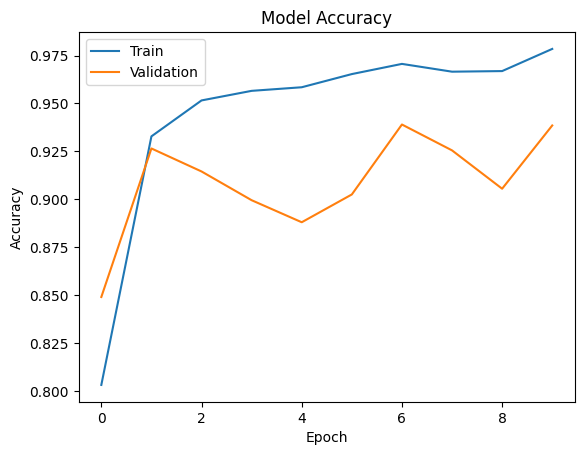

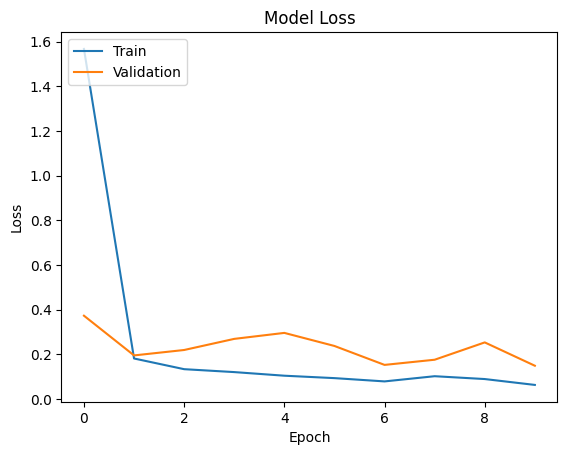

25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 222ms/step


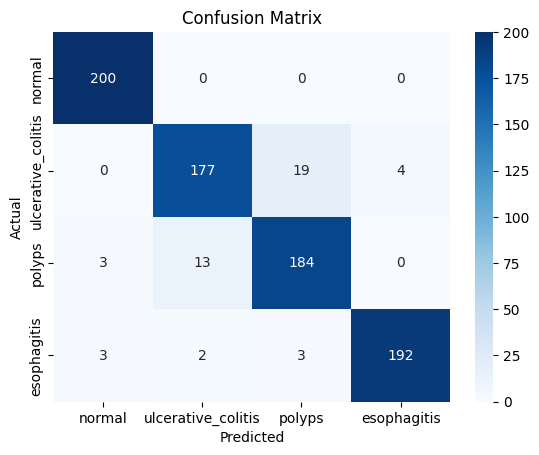

In [ ]:
# --- Import necessary libraries ---
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout  # Layers for building the model
from tensorflow.keras.models import Model, Sequential  # Model architectures
from tensorflow.keras.applications import InceptionV3  # Pretrained model
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing
from tensorflow.keras.callbacks import ReduceLROnPlateau  # Learning rate scheduler
from tensorflow.keras.preprocessing import image  # For image loading utilities

from sklearn.metrics import confusion_matrix  # Evaluation metric

import numpy as np  # Numerical operations
from glob import glob  # File path utilities
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced plotting

# %matplotlib inline  # Ensures plots appear in notebook output (remove in scripts)

# --- Image settings and dataset paths ---
IMAGE_SIZE = [256, 256, 3]  # Image dimensions expected by the model

train_path = '/content/data/train'  # Path to training data
test_path = '/content/data/test'    # Path to test data
val_path = '/content/data/val'      # Path to validation data

# --- Data generators for loading and normalizing images ---
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize training data
test_datagen = ImageDataGenerator(rescale=1./255)   # Normalize test data
val_datagen = ImageDataGenerator(rescale=1./255)    # Normalize validation data

# --- Load and preprocess datasets from directories ---
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep order for confusion matrix
)

val_set = val_datagen.flow_from_directory(
    val_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

# --- Load InceptionV3 base model with pre-trained ImageNet weights ---
base_model_inceptionV3 = InceptionV3(
    input_shape=IMAGE_SIZE,
    weights='imagenet',
    include_top=False,  # Remove default classification head
    pooling='max'       # Global max pooling at the end
)

# --- Freeze all layers to use as a fixed feature extractor ---
for layer in base_model_inceptionV3.layers:
    layer.trainable = False

# --- Add custom classification layers on top ---
x = base_model_inceptionV3.output
x = Flatten()(x)  # Flatten the feature maps
x = Dense(1024, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Regularization to prevent overfitting
prediction = Dense(4, activation='softmax')(x)  # Output layer for 4 classes

# --- Combine base model with custom head ---
final_model = Model(inputs=base_model_inceptionV3.input, outputs=prediction)

# --- Compile the model ---
final_model.compile(
    loss='categorical_crossentropy',  # Loss for multi-class classification
    optimizer='adam',                 # Optimizer
    metrics=['accuracy']              # Evaluation metric
)

# --- Train the model ---
history = final_model.fit(
    training_set,
    validation_data=val_set,
    epochs=10
)

# --- Evaluate on test set ---
print("Evaluating on test data ....")
results = final_model.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results)

# --- Plot training/validation accuracy ---
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# --- Plot training/validation loss ---
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# --- Predict classes for test set ---
Y_pred = np.argmax(final_model.predict(test_set), axis=1)
Y_test = test_set.classes

# --- Generate and display confusion matrix ---
cm1 = confusion_matrix(Y_test, Y_pred)

class_names = ['normal', 'ulcerative_colitis', 'polyps', 'esophagitis']  # Match your folder naming but remove numbers

# Plot the confusion matrix with labels
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step


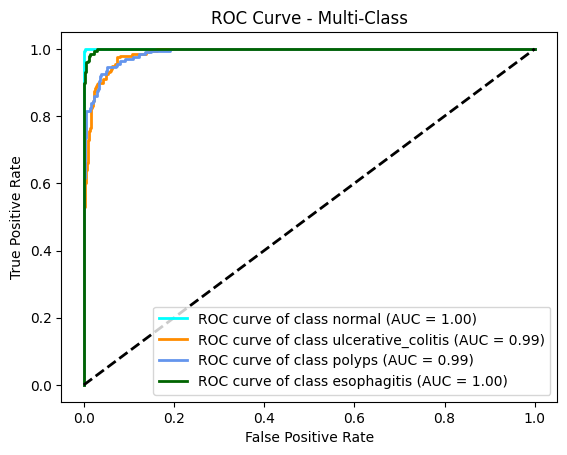

Classification Report:
                    precision    recall  f1-score   support

            normal       0.97      1.00      0.99       200
ulcerative_colitis       0.92      0.89      0.90       200
            polyps       0.89      0.92      0.91       200
       esophagitis       0.98      0.96      0.97       200

          accuracy                           0.94       800
         macro avg       0.94      0.94      0.94       800
      weighted avg       0.94      0.94      0.94       800


Precision (weighted): 0.9414
Recall (weighted): 0.9413
F1 Score (weighted): 0.9411
Macro AUC: 0.9941
Micro AUC: 0.9958


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# --- Binarize the labels for multi-class ROC ---
n_classes = 4
Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2, 3])
Y_pred_proba = final_model.predict(test_set)  # Get probabilities, not class labels

# --- Compute ROC curve and AUC for each class ---
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Plot all ROC curves ---
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'darkgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class')
plt.legend(loc="lower right")
plt.show()

# --- Print classification report ---
print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=class_names))

# --- Calculate and print overall metrics ---
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')
macro_auc = roc_auc_score(Y_test_bin, Y_pred_proba, average='macro', multi_class='ovr')
micro_auc = roc_auc_score(Y_test_bin, Y_pred_proba, average='micro', multi_class='ovr')

print(f"\nPrecision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print(f"Macro AUC: {macro_auc:.4f}")
print(f"Micro AUC: {micro_auc:.4f}")



### 📊 What is Macro AUC?

**Macro AUC** (Macro-Averaged Area Under the Curve) is a metric used to evaluate the performance of **multi-class classification models**.


### 🔍 Quick Recap:
- **AUC** = Area Under the ROC Curve
- Measures how well the model can distinguish between classes
- **Higher AUC** = better class separability


### 🧮 How Macro AUC Works:
In a multi-class setting, we compute AUC for each class individually using a **one-vs-rest** strategy (i.e., treat each class as positive, the rest as negative).

Then we take the **average across all classes**:

$$
\text{Macro AUC} = \frac{1}{K} \sum_{i=1}^{K} AUC_i
$$

Where:
- $K$ = number of classes
- $AUC_i$ = AUC score for class $i$

Each class is treated **equally**, no matter how many samples it has.


### ✅ Why Use Macro AUC?
- **Fair to all classes**, especially useful when classes are **imbalanced**
- Helps you evaluate if the model is treating minority classes well


### 🆚 Macro AUC vs. Micro AUC
| Metric       | What it Does                            | Best Use Case                        |
|--------------|------------------------------------------|--------------------------------------|
| **Macro AUC** | Averages AUC per class (equal weight)   | Handle class imbalance fairly        |
| **Micro AUC** | Aggregates all predictions globally     | Emphasize performance on big classes |


### Summary:
> Macro AUC tells you, on average, how well your model distinguishes each class from the rest — giving **equal importance to every class**.

### 📊 What is Micro AUC?

**Micro AUC** (Micro-Averaged AUC) is another way to evaluate the performance of multi-class or multi-label classifiers.


### 🔍 How Micro AUC Works:
- Instead of computing AUC for each class, **Micro AUC flattens all predictions across all classes** into a single binary classification task.
- It then computes the **ROC curve and AUC on this combined set** of predictions.

This gives you a **global view** of the model’s performance.


### 🧮 Micro AUC Formula:
There’s no individual class-wise calculation here. Instead, all true labels and predicted scores are flattened:

$$
\text{Micro AUC} = \text{AUC}(\text{flattened true labels},\ \text{flattened predicted scores})
$$

Where:
- Both arrays include all predictions and labels across all classes.


### ✅ Why Use Micro AUC?
- Good when you want to reflect the model's performance **across all instances**, **weighted by class frequency**.
- Useful in **multi-label** settings or when class imbalance isn't a concern.


### Summary:
> Micro AUC gives you a single AUC score by treating every prediction across all classes as one big set. It's useful when you're more interested in **overall correctness** rather than fairness across classes.

🎓 Analogy
- Macro AUC:
 - You’re a teacher grading each student (class) individually, then averaging all their scores equally, no matter how many questions each student answered.

- Micro AUC:
 - You collect every single test question from all students and ask:
“How well did the class do overall?”
The more questions a student answered (i.e., class size), the more they impact the average.

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


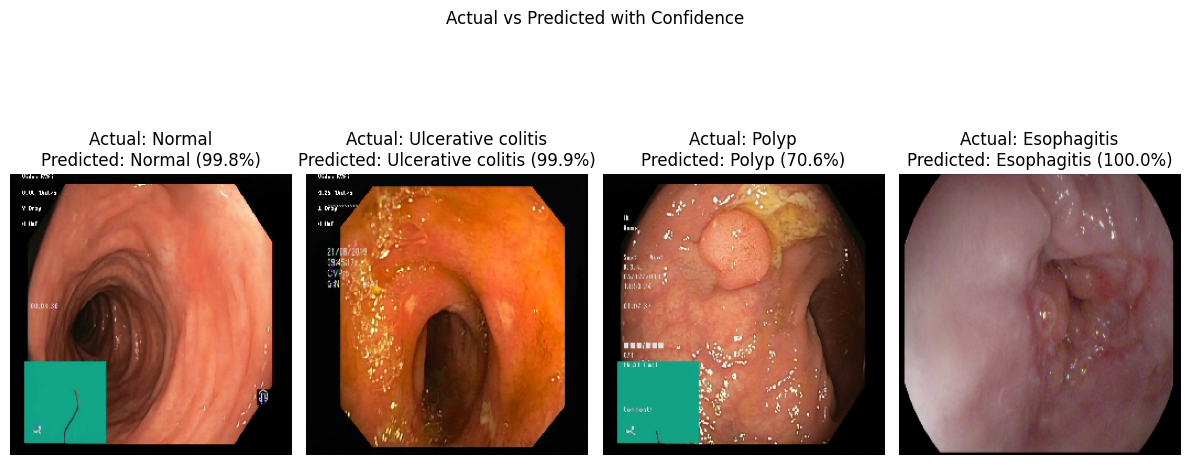

In [ ]:
# --- Import necessary libraries ---
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Assuming 'final_model' is already defined and loaded in your environment

# Define class names and a sample image from each class
class_names = ['Normal', 'Ulcerative colitis', 'Polyp', 'Esophagitis']
image_paths = [
    '/content/data/test/0_normal/test_normal_ (1).jpg',
    '/content/data/test/1_ulcerative_colitis/test_ulcer_ (1).jpg',
    '/content/data/test/2_polyps/test_polyps_ (1).jpg',
    '/content/data/test/3_esophagitis/test_esophagitis_ (1).jpg'
]

plt.figure(figsize=(12, 6))

for i, (class_name, img_path) in enumerate(zip(class_names, image_paths)):
    # Load and preprocess the image
    img = load_img(img_path, target_size=(256, 256))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make prediction
    pred = final_model.predict(img_array)
    pred_class = np.argmax(pred)
    pred_label = class_names[pred_class]
    confidence = pred[0][pred_class] * 100

    # Plot the image with actual label, predicted label, and probability
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Actual: {class_name}\nPredicted: {pred_label} ({confidence:.1f}%)")
    plt.axis('off')

plt.suptitle("Actual vs Predicted with Confidence")
plt.tight_layout()
plt.show()


The code below demonstrates how to perform fine-tuning using the TensorFlow framework with a pre-trained InceptionV3 model for classifying colonoscopy images into four diagnostic categories: Normal, Ulcerative Colitis, Polyp, and Esophagitis. Unlike basic feature extraction, where the pre-trained model is frozen entirely, this workflow selectively unfreezes the later layers of InceptionV3, allowing them to be retrained on the custom medical dataset. This makes the model more adaptable to domain-specific patterns found in colonoscopy images. The dataset is loaded from directory-structured folders and normalized using ImageDataGenerator. A custom classification head with dense layers and dropout is added on top of the base model. The model is compiled, trained, and evaluated using accuracy/loss metrics and a confusion matrix. Finally, the notebook includes a visual prediction step where sample test images are displayed alongside predicted labels and confidence scores. This setup showcases how fine-tuning can help tailor powerful pre-trained models to specialized medical tasks, improving performance over feature extraction alone.

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 434ms/step - accuracy: 0.8443 - loss: 1.6939 - val_accuracy: 0.7415 - val_loss: 6.0515
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 342ms/step - accuracy: 0.9890 - loss: 0.0390 - val_accuracy: 0.9555 - val_loss: 0.5618
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 348ms/step - accuracy: 0.9928 - loss: 0.0180 - val_accuracy: 0.9315 - val_loss: 0.6743
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 359ms/step - accuracy: 0.9908 - loss: 0.0423 - val_accuracy: 0.9050 - val_loss: 0.7152
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 354ms/step - accuracy: 0.9952 - loss: 0.0122 - val_accuracy: 0.8870 - val_loss: 0.7483
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 347ms/step - accuracy: 0.9997 - loss: 0.0023 - val_accuracy: 0.8590 - val_loss: 0.9180
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 346ms/step - accuracy: 0.9995 - loss: 0.0029 

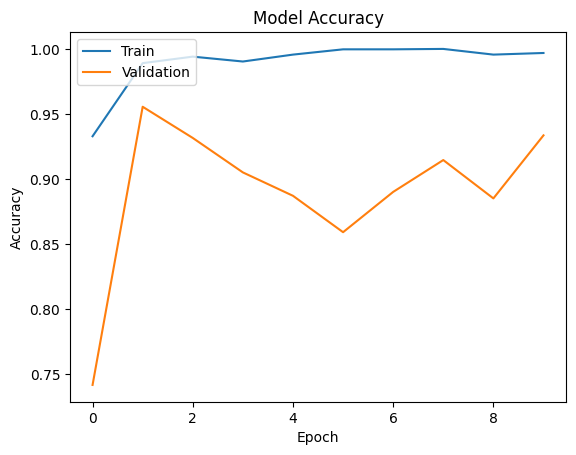

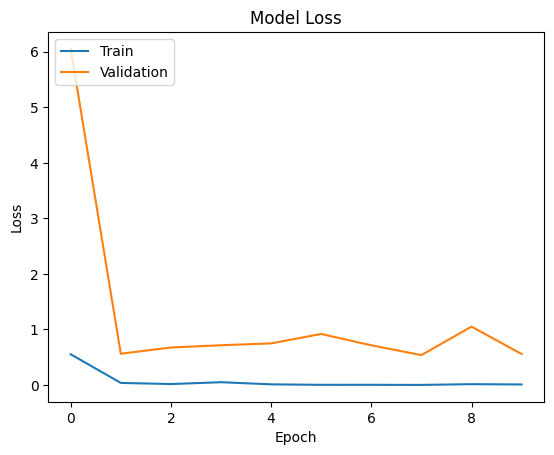

25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 225ms/step


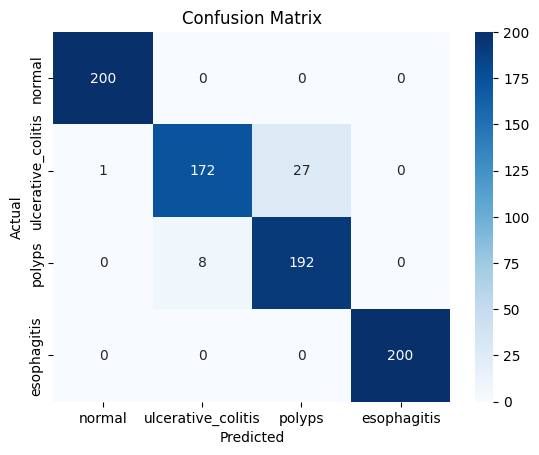

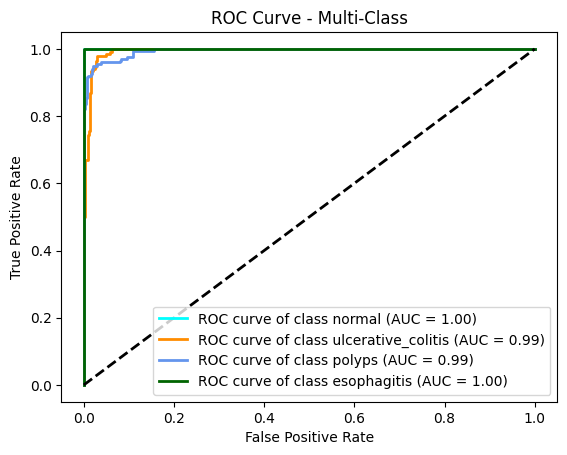

Classification Report:
                    precision    recall  f1-score   support

            normal       1.00      1.00      1.00       200
ulcerative_colitis       0.96      0.86      0.91       200
            polyps       0.88      0.96      0.92       200
       esophagitis       1.00      1.00      1.00       200

          accuracy                           0.95       800
         macro avg       0.96      0.95      0.95       800
      weighted avg       0.96      0.95      0.95       800


Precision (weighted): 0.9568
Recall (weighted): 0.9550
F1 Score (weighted): 0.9548
Macro AUC: 0.9971


In [ ]:
# Fine-tuning InceptionV3 on custom colon dataset
# --- Import necessary libraries ---
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline  # Only for Jupyter notebooks

# --- Image setup ---
IMAGE_SIZE = [256, 256, 3]
train_path = '/content/data/train'
test_path = '/content/data/test'
val_path = '/content/data/val'

# --- Data preprocessing ---
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_path, target_size=(256, 256), batch_size=32, class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path, target_size=(256, 256), batch_size=32, class_mode='categorical', shuffle=False)
val_set = val_datagen.flow_from_directory(val_path, target_size=(256, 256), batch_size=32, class_mode='categorical')

# --- Load pre-trained model and unfreeze some layers for fine-tuning ---
base_model = InceptionV3(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False, pooling='max')

# Freeze early layers
freeze_until = 249
for layer in base_model.layers[:freeze_until]:
    layer.trainable = False
for layer in base_model.layers[freeze_until:]:
    layer.trainable = True

# --- Add custom classification head ---
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=prediction)

# --- Compile model ---
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# --- Train the model ---
history = model.fit(
    training_set,
    validation_data=val_set,
    epochs=10
)

# --- Evaluate model ---
print("Evaluating on test data ....")
results = model.evaluate(test_set, batch_size=32)
print("Test Loss: {:.4f}, Test Accuracy: {:.4f}".format(results[0], results[1]))

# --- Plot accuracy ---
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# --- Plot loss ---
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# --- Predict classes ---
Y_pred_proba = model.predict(test_set)
Y_pred = np.argmax(Y_pred_proba, axis=1)
Y_test = test_set.classes

# --- Confusion Matrix ---
cm1 = confusion_matrix(Y_test, Y_pred)
class_names = ['normal', 'ulcerative_colitis', 'polyps', 'esophagitis']

sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# --- ROC Curve and AUC ---
n_classes = 4
Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'darkgreen'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class')
plt.legend(loc="lower right")
plt.show()

# --- Classification Report ---
print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=class_names))

# --- Metrics: Precision, Recall, F1, AUC ---
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')
macro_auc = roc_auc_score(Y_test_bin, Y_pred_proba, average='macro', multi_class='ovr')

print(f"\nPrecision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print(f"Macro AUC: {macro_auc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


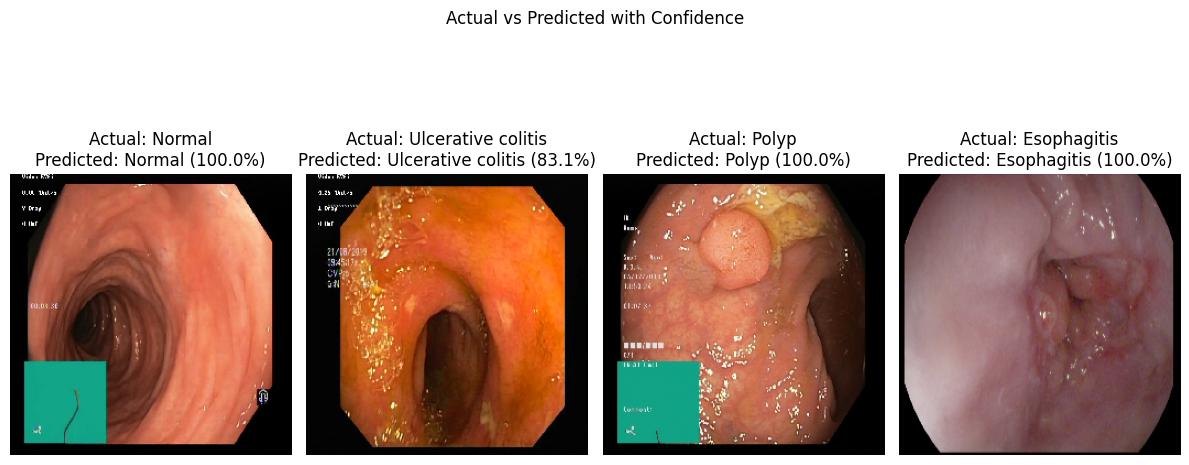

In [ ]:
# --- Import necessary libraries ---
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Use the same preprocessing as training
class_names = ['Normal', 'Ulcerative colitis', 'Polyp', 'Esophagitis']
image_paths = [
    '/content/data/test/0_normal/test_normal_ (1).jpg',
    '/content/data/test/1_ulcerative_colitis/test_ulcer_ (1).jpg',
    '/content/data/test/2_polyps/test_polyps_ (1).jpg',
    '/content/data/test/3_esophagitis/test_esophagitis_ (1).jpg'
]

plt.figure(figsize=(12, 6))

for i, (class_name, img_path) in enumerate(zip(class_names, image_paths)):
    # Load and preprocess the image
    img = load_img(img_path, target_size=(256, 256))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Same as ImageDataGenerator(rescale=1./255)

    # Predict using the trained model
    pred = model.predict(img_array)
    pred_class = np.argmax(pred)
    pred_label = class_names[pred_class]
    confidence = pred[0][pred_class] * 100

    # Plot image with prediction
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Actual: {class_name}\nPredicted: {pred_label} ({confidence:.1f}%)")
    plt.axis('off')

plt.suptitle("Actual vs Predicted with Confidence")
plt.tight_layout()
plt.show()


The code below demonstrates how to build, train, and evaluate a U-Net-based deep learning model for breast ultrasound image segmentation using TensorFlow and Keras. The dataset used is the BUSI (Breast Ultrasound Images) dataset, which includes both benign and malignant lesion images with corresponding ground truth segmentation masks. After mounting Google Drive and extracting the dataset, the code loads and preprocesses images and masks, converting them into binary format and resizing them to a uniform 256×256 resolution. A custom U-Net architecture is implemented to perform pixel-wise segmentation. The model is compiled with binary cross-entropy loss and includes evaluation metrics such as Dice Coefficient and Intersection over Union (IoU) — both critical for assessing segmentation quality in medical imaging. The training and validation performance are plotted, followed by prediction visualization on test images. Finally, the model is evaluated quantitatively and saved for future inference. This notebook offers a full pipeline for medical image segmentation and can be adapted to other biomedical datasets with minor adjustments.

Breast Ultrasound Images Dataset: https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset

In [ ]:
# ----------------------------------------
# Step 1: Mount Google Drive
# ----------------------------------------

from google.colab import drive

# Mount your Google Drive so Colab can access files stored there
drive.mount('/content/gdrive')

# ----------------------------------------
# Step 2: Dataset Instructions
# ----------------------------------------

# DATASET SOURCE:
# Breast Ultrasound Images Dataset:
# https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset

# INSTRUCTIONS FOR STUDENTS:
# 1. Download the dataset from the Kaggle link above (you may need a Kaggle account).
# 2. Save the downloaded zip file (Dataset_BUSI_with_GT.zip) to your Google Drive.
#    Suggested location: MyDrive/ColabNotebooks_PegahKhosravi/CS74020_Spring2025/
# 3. Ensure the file path in the unzip command below matches the location of your zip file in Drive.

# ----------------------------------------
# Step 3: Unzip the Dataset into Colab Workspace
# ----------------------------------------

# The dataset will be extracted into a local folder named /content/
!unzip -q "/content/gdrive/MyDrive/ColabNotebooks_PegahKhosravi/CS74020_Spring2025/Dataset_BUSI_with_GT.zip" -d /content/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 59s 423ms/step - accuracy: 0.8308 - dice_coef: 0.1850 - iou_metric: 0.1027 - loss: 0.4843 - val_accuracy: 0.1139 - val_dice_coef: 0.1756 - val_iou_metric: 0.0969 - val_loss: 80.7680
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9230 - dice_coef: 0.2738 - iou_metric: 0.1597 - loss: 0.2741 - val_accuracy: 0.4230 - val_dice_coef: 0.2303 - val_iou_metric: 0.1315 - val_loss: 7.9437
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9332 - dice_coef: 0.3607 - iou_metric: 0.2217 - loss: 0.2222 - val_accuracy: 0.7252 - val_dice_coef: 0.3305 - val_iou_metric: 0.2009 - val_loss: 1.1004
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9295 - dice_coef: 0.3993 - iou_metric: 0.2511 - loss: 0.2107 - val_accuracy: 0.4930 - val_dice_coef: 0.2231 - val_iou_metric: 0.1269 - val_loss: 5.7556
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.9332 - dice_coef: 0.3970 - iou_metric: 0.2507 - loss: 0.2007 - v

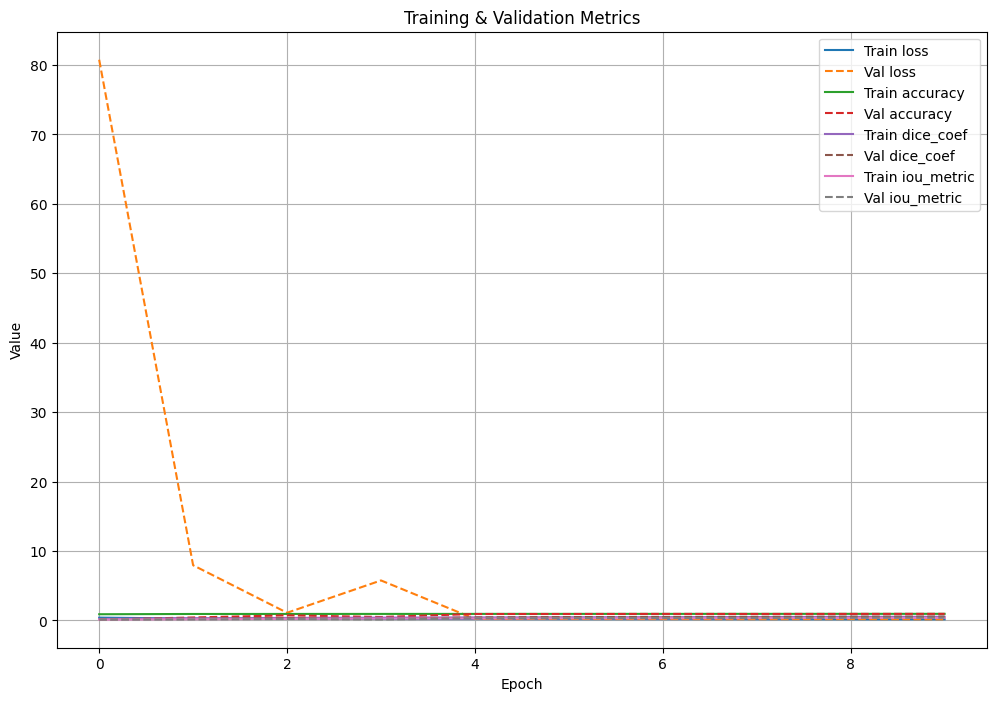


📊 Test Results:
Loss:        0.1587
Accuracy:    0.9439
Dice Coef:   0.5524
IoU Metric:  0.3827
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


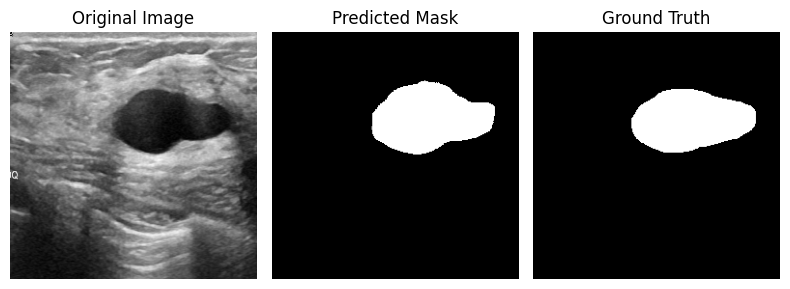

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


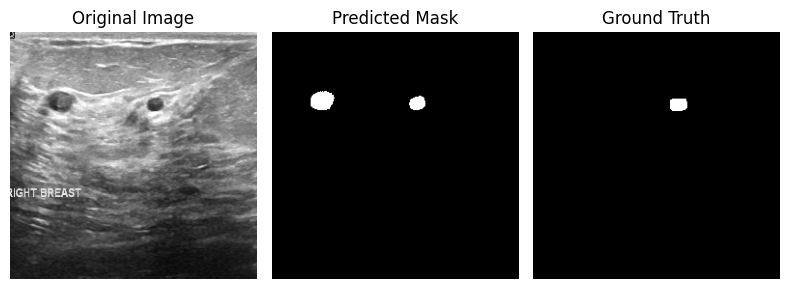

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


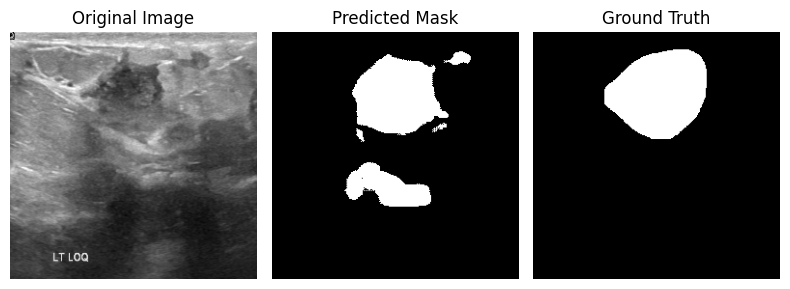

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


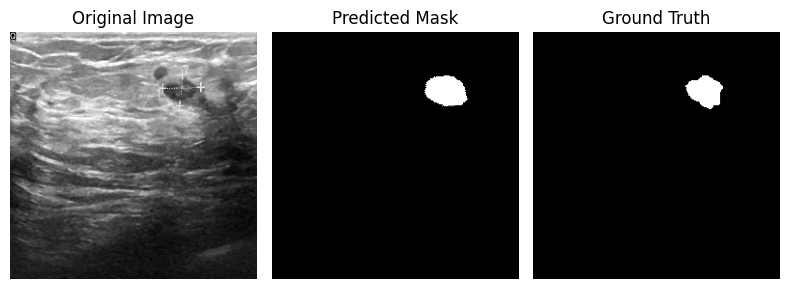

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


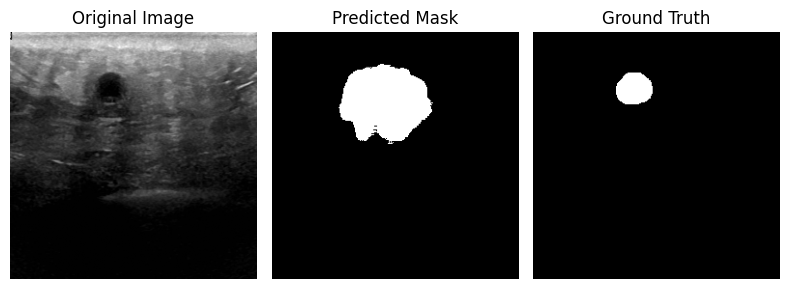

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


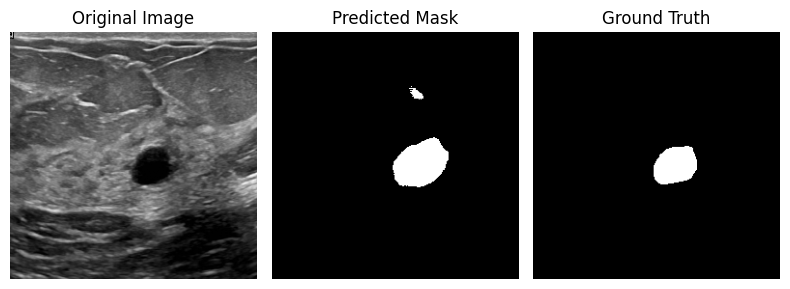

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


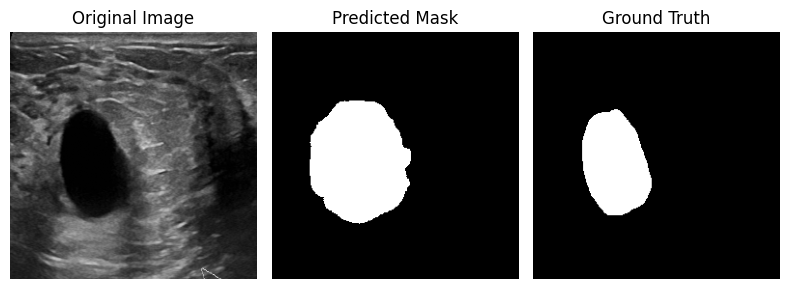

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


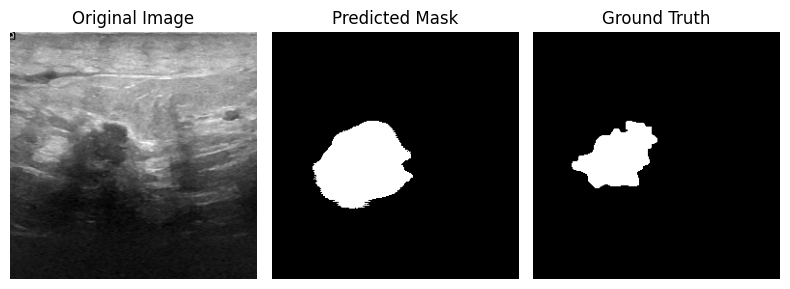

In [ ]:
# --- Setup ---
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from google.colab import drive
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K

# --- Load Images and Masks ---
def load_dataset(img_dir, mask_dir, img_size=256):
    images = []
    masks = []
    for file in os.listdir(img_dir):
        if file.endswith('.png') and not file.endswith('_mask.png'):
            mask_file = file.replace('.png', '_mask.png')
            img_path = os.path.join(img_dir, file)
            mask_path = os.path.join(mask_dir, mask_file)
            if os.path.exists(mask_path):
                # Load image as color and mask as grayscale
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                img = cv2.resize(img, (img_size, img_size))
                img = img / 255.0

                mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                mask = cv2.resize(mask, (img_size, img_size))
                mask = (mask > 0).astype(np.float32)  # Binary mask

                images.append(img)
                masks.append(mask)
    images = np.array(images)
    masks = np.expand_dims(np.array(masks), axis=-1)
    return images, masks

# Load benign and malignant data
benign_imgs, benign_masks = load_dataset(
    '/content/Dataset_BUSI_with_GT/benign',
    '/content/Dataset_BUSI_with_GT/benign'
)
malignant_imgs, malignant_masks = load_dataset(
    '/content/Dataset_BUSI_with_GT/malignant',
    '/content/Dataset_BUSI_with_GT/malignant'
)

images = np.concatenate([benign_imgs, malignant_imgs])
masks = np.concatenate([benign_masks, malignant_masks])
masks = np.expand_dims(masks, axis=-1)  # Add channel dimension

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

# --- Custom Metrics ---
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def iou_metric(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

# --- U-Net Model ---
def conv_block(x, filters, use_bn=True):
    for _ in range(2):
        x = tf.keras.layers.Conv2D(filters, 3, padding='same', kernel_initializer='he_normal')(x)
        if use_bn:
            x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Activation('relu')(x)
    return x

def build_unet(input_shape=(256, 256, 3), filters=16, dropout=0.1, use_bn=True):
    inputs = tf.keras.Input(input_shape)
    c1 = conv_block(inputs, filters, use_bn)
    p1 = tf.keras.layers.MaxPooling2D()(c1)
    p1 = tf.keras.layers.Dropout(dropout)(p1)

    c2 = conv_block(p1, filters*2, use_bn)
    p2 = tf.keras.layers.MaxPooling2D()(c2)
    p2 = tf.keras.layers.Dropout(dropout)(p2)

    c3 = conv_block(p2, filters*4, use_bn)
    p3 = tf.keras.layers.MaxPooling2D()(c3)
    p3 = tf.keras.layers.Dropout(dropout)(p3)

    c4 = conv_block(p3, filters*8, use_bn)
    p4 = tf.keras.layers.MaxPooling2D()(c4)
    p4 = tf.keras.layers.Dropout(dropout)(p4)

    c5 = conv_block(p4, filters*16, use_bn)

    u6 = tf.keras.layers.Conv2DTranspose(filters*8, 2, strides=2, padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    u6 = tf.keras.layers.Dropout(dropout)(u6)
    c6 = conv_block(u6, filters*8, use_bn)

    u7 = tf.keras.layers.Conv2DTranspose(filters*4, 2, strides=2, padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    u7 = tf.keras.layers.Dropout(dropout)(u7)
    c7 = conv_block(u7, filters*4, use_bn)

    u8 = tf.keras.layers.Conv2DTranspose(filters*2, 2, strides=2, padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    u8 = tf.keras.layers.Dropout(dropout)(u8)
    c8 = conv_block(u8, filters*2, use_bn)

    u9 = tf.keras.layers.Conv2DTranspose(filters, 2, strides=2, padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1])
    u9 = tf.keras.layers.Dropout(dropout)(u9)
    c9 = conv_block(u9, filters, use_bn)

    outputs = tf.keras.layers.Conv2D(1, 1, activation='sigmoid')(c9)
    return tf.keras.Model(inputs, outputs)

# --- Compile Model ---
model = build_unet()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', dice_coef, iou_metric])

# --- Train Model ---
history = model.fit(X_train, y_train, epochs=10, batch_size=8,
                    validation_data=(X_test, y_test), verbose=1)

# --- Plot Training and Validation Metrics ---
def plot_metrics(history):
    metrics = ['loss', 'accuracy', 'dice_coef', 'iou_metric']
    plt.figure(figsize=(12, 8))
    for metric in metrics:
        plt.plot(history.history[metric], label=f'Train {metric}')
        plt.plot(history.history[f'val_{metric}'], linestyle='--', label=f'Val {metric}')
    plt.title('Training & Validation Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metrics(history)

# --- Evaluate on Test Set ---
test_loss, test_acc, test_dice, test_iou = model.evaluate(X_test, y_test, verbose=0)
print(f"\n📊 Test Results:")
print(f"Loss:        {test_loss:.4f}")
print(f"Accuracy:    {test_acc:.4f}")
print(f"Dice Coef:   {test_dice:.4f}")
print(f"IoU Metric:  {test_iou:.4f}")


# --- Predict and Visualize ---

def predict_and_plot(model, images, masks, index):
    pred = model.predict(np.expand_dims(images[index], axis=0))[0, :, :, 0]
    pred_mask = (pred > 0.5).astype(np.float32)

    fig, axs = plt.subplots(1, 3, figsize=(8, 4))
    axs[0].imshow(images[index])
    axs[0].set_title('Original Image')
    axs[1].imshow(pred_mask, cmap='gray')
    axs[1].set_title('Predicted Mask')
    axs[2].imshow(masks[index, :, :, 0], cmap='gray')
    axs[2].set_title('Ground Truth')
    for ax in axs:
        ax.axis('off')
    plt.tight_layout()
    plt.show()


# --- Show predictions ---

for idx in [1, 2, 3, 5, 7, 8, 9, 10]:
    predict_and_plot(model, X_test, y_test, idx)

def compute_metrics_on_test_set(model, X_test, y_test):
    dices = []
    ious = []
    for i in range(len(X_test)):
        pred = model.predict(np.expand_dims(X_test[i], axis=0))[0, :, :, 0]
        pred_bin = (pred > 0.5).astype(np.float32)
        true_mask = y_test[i, :, :, 0]

        intersection = np.sum(pred_bin * true_mask)
        union = np.sum(pred_bin) + np.sum(true_mask)
        dice = (2. * intersection + 1e-7) / (union + 1e-7)
        iou = (intersection + 1e-7) / (np.sum(pred_bin) + np.sum(true_mask) - intersection + 1e-7)

        dices.append(dice)
        ious.append(iou)

    print("\n📈 Manual Averaged Per-Image Metrics:")
    print(f"Mean Dice: {np.mean(dices):.4f}")
    print(f"Mean IoU:  {np.mean(ious):.4f}")


# --- Save Model ---
model.save('BreastCancerSegmentor.h5')


**What is IoU and Dice Score?**

When evaluating how well a segmentation model works (like U-Net), we need to measure how much the predicted mask overlaps with the ground truth mask. Two of the most widely used metrics for this are **IoU (Intersection over Union)** and **Dice Score**.


### Intersection over Union (IoU)
Also known as the **Jaccard Index**, IoU measures the area of overlap between the predicted mask and the ground truth, divided by the area of their union.

**Formula:**
```
IoU = (Area of Overlap) / (Area of Union)
```

**In terms of pixels:**
```
IoU = TP / (TP + FP + FN)
```
Where:
- TP = True Positive (correctly predicted positive pixels)
- FP = False Positive (predicted positive, actually negative)
- FN = False Negative (predicted negative, actually positive)

**Range:** 0 (no overlap) to 1 (perfect overlap)

**Use case:** More strict than Dice, often used in object detection and segmentation.


### Dice Coefficient
Dice is another similarity metric that focuses on the overlap between two sets.

**Formula:**
```
Dice = 2 * (Area of Overlap) / (Total Pixels in Both Masks)
```

**In terms of pixels:**
```
Dice = 2TP / (2TP + FP + FN)
```

**Range:** 0 to 1

**Interpretation:** Dice is a bit more forgiving than IoU. It places more emphasis on the correct positive predictions.


### Example:
Let's say your model predicted 80 pixels as tumor, and 70 of them were correct. The ground truth has 90 tumor pixels.
- TP = 70
- FP = 10
- FN = 20

Then:
- IoU = 70 / (70 + 10 + 20) = 70 / 100 = 0.70
- Dice = 2x70 / (2x70 + 10 + 20) = 140 / 170 ≈ 0.82



**Understanding Accuracy in U-Net Segmentation**

In traditional classification tasks, **accuracy** is simple: it's the percentage of correct predictions out of all predictions. But what does "accuracy" mean in **segmentation**, particularly with models like **U-Net**?

### Accuracy in U-Net = Pixel-wise Accuracy

U-Net performs **binary segmentation** by classifying **each pixel** as either:
- **1 (tumor / lesion / foreground)**
- **0 (background)**

So, accuracy is calculated **per pixel** rather than per image.

**Formula:**
```
Accuracy = (TP + TN) / (TP + TN + FP + FN)
```
Where:
- TP = pixels correctly predicted as tumor
- TN = pixels correctly predicted as background
- FP = pixels wrongly predicted as tumor
- FN = pixels wrongly predicted as background

### 🎭 Example:
Say we have an image of 65,536 pixels (256x256):
- Tumor area (ground truth) = 2,500 pixels
- Background = 63,036 pixels

If the model predicts **everything as background**:
- TP = 0
- TN = 63,036
- FP = 0
- FN = 2,500

Then:
```
Accuracy = (0 + 63,036) / 65,536 ≈ 0.9619 or 96.19%
```
Even though the model completely **missed the tumor**, the accuracy looks great!


### ⚠️ Why Pixel Accuracy Can Be Misleading
- **Class imbalance**: Medical images often have very small lesion areas.
- The model can get high accuracy by just predicting everything as background.

**Better Metrics for Segmentation:**
- **Dice Coefficient**: Focuses on the overlap of positive pixels
- **IoU (Intersection over Union)**: Measures how much the prediction overlaps with the true lesion area


### Summary Table:
| Metric   | Focus              | Best Use Case            |
|----------|--------------------|---------------------------|
| Accuracy | All pixels         | Balanced datasets         |
| Dice     | Positive overlap   | Small objects, medical    |
| IoU      | Overall match      | Precise segmentation eval |


In short: U-Net does pixel-wise classification, so accuracy means % of pixels classified correctly. But because most pixels are background, this number can hide poor performance on the **actual region of interest**. Use **Dice and IoU** for a better picture!



## Can CNNs be used for regression?
Yes! While CNNs are often used for classification, they can also be adapted to solve **regression problems**, where the goal is to predict **continuous values** instead of categories.

### 1. Feature extraction (just like in classification):
- CNNs use convolutional layers to scan the image and **learn patterns**, such as edges, textures, or shapes.
- Pooling layers reduce dimensionality while retaining important features.
- These layers help the model **understand visual structures** in the input image.

### 2. Flattening and dense layers:
- After the convolutional layers, the output is **flattened into a 1D vector**.
- This vector is passed through one or more **dense (fully connected) layers** to learn complex relationships between the extracted features and the target value.

### 3. Regression-specific output:
- The final layer has:
  - **1 neuron** if you're predicting a single value (e.g., tumor size).
  - **Multiple neurons** if you're predicting multiple values (e.g., x and y coordinates).
- **No activation function** (or a **linear** one) is used here because regression needs to output a **range of real numbers**, not limited to a specific range like [0,1] or [0, ∞].

### 4. Loss function:
- Instead of classification losses like cross-entropy, CNNs for regression use:
  - **Mean Squared Error (MSE)**
  - **Mean Absolute Error (MAE)**
- These loss functions measure the **difference between predicted and actual values**.

## 🏥 Examples in medical imaging:
- Estimating **tumor volume** from MRI scans.
- Predicting **bone age** from X-ray images.
- Predicting **disease progression scores** from retinal or histopathological images.

In [ ]:
# CNN for Regression Example (Keras) using Breast Cancer Data
# This notebook demonstrates how to apply a Convolutional Neural Network (CNN) to a regression problem.
# Specifically, we use features from the Wisconsin Breast Cancer dataset to predict the continuous value
# of the 'mean radius' of a tumor, treating it as a regression task instead of classification.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load Wisconsin Breast Cancer dataset
data = load_breast_cancer()
X_data = data.data  # Features
y_data = data.target  # Binary targets (we'll use mean radius as regression target instead)

# For regression, use a continuous target — e.g., 'mean radius' (feature index 0)
y = X_data[:, 0]  # Continuous values
describe_target = data.feature_names[0]
X = X_data[:, 1:29]  # Use remaining 28 features to predict it

# Normalize input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Adjust input shape for CNN (reshape 28 features into 7x4 "image")
X_reshaped = X_scaled.reshape(-1, 7, 4, 1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Build CNN model for regression
model = Sequential([
    Input(shape=(7, 4, 1)),
    Conv2D(32, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Linear activation for regression
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

# Predict on test data
predictions = model.predict(X_test[:5])

# Print actual and predicted values to compare
print("Actual values:   ", y_test[:5])
print("Predicted values:", predictions.flatten())

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 209.8385 - mae: 14.0536 - val_loss: 175.9983 - val_mae: 12.8669
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 164.0069 - mae: 12.3795 - val_loss: 103.8575 - val_mae: 9.7548
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81.2295 - mae: 8.3274 - val_loss: 17.4390 - val_mae: 3.6952
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.4305 - mae: 2.7435 - val_loss: 7.6011 - val_mae: 1.9227
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.2097 - mae: 2.2035 - val_loss: 7.4841 - val_mae: 2.1129
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4087 - mae: 2.2292 - val_loss: 7.0908 - val_mae: 2.0051
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.7656 - mae: 1.9967 - val_loss: 7.0644 - val_mae: 2.0496
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6794 - mae: 2.1887 - val_loss: 6.7111 - val_mae: 1.9641
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss:

## CNN Regression with Tabular Data Explained

In this example, we demonstrate how to use a Convolutional Neural Network (CNN) for a **regression task** using tabular data from the Wisconsin Breast Cancer dataset. While CNNs are traditionally used for image data, we can reshape tabular data to mimic an image format to leverage CNN architectures.

### Why reshape tabular data into an "image"?
CNNs expect inputs in the form:
```
(height, width, channels)
```
This is the same shape as an image: for example, a 28x28 grayscale image has shape (28, 28, 1).

The original dataset has **28 numerical features** (excluding the target).
To fit this into a CNN, we reshape the data like this:
```python
X_scaled.reshape(-1, 7, 4, 1)  # 7 rows × 4 columns × 1 channel = 28 features
```
This way, each sample becomes a 7x4 "image" with 1 channel — not an actual image, but structured like one so the CNN can scan patterns spatially.

### What is the CNN predicting?
We treat one of the continuous features — **"mean radius"** of the tumor — as the regression target. The CNN is trained to predict this value based on the other 28 features.

### Result Interpretation
After training the CNN, we evaluated it by predicting the target for 5 test samples:

```
Actual values:    [12.47 18.94 15.46 12.4  11.54]
Predicted values: [12.597911 17.755934 15.327744 12.258793 11.496449]
```

These results show that the CNN is **closely approximating** the true target values:
- The predictions are not exact, but they are **very close**, showing the model has learned the underlying patterns.
- Small differences between predicted and actual values are expected in any regression model.

### Why is this important?
This approach shows how:
- CNNs can be **adapted beyond images**.
- Tabular data can be used creatively to take advantage of deep learning architectures.
- A seemingly simple reshaping operation opens the door to using powerful models like CNNs for non-visual tasks.